>[A Guide on Forecasting in Stockmarkets](#scrollTo=wmZVC0nCGwO3)

>[Learn Through Example](#scrollTo=7hERnU8ZJZMS)

>[Introduction to Time Series](#scrollTo=25i0jJZtS32P)

>[Data-Generating Process](#scrollTo=Ng1uRg1ApMbK)

>>>[White noise](#scrollTo=6f8n4MDSpSyG)

>>>[Red Noise](#scrollTo=OBJmGIv9pc-z)

>>>[Cyclical or seasonal signals](#scrollTo=LzqyEYcGsUZb)

>>>[Autoregressive signals](#scrollTo=v6vjlhaFsfs1)

>>>[Mixed signals](#scrollTo=eGfTUWF_skW6)

>>[Stationarity](#scrollTo=3xt6CtwD2q7k)

>[Linear Regression in Time Series](#scrollTo=FowQJXzjL7oh)

>>>[Feature Selection in Time Series Data](#scrollTo=NWPzb5GgUX5V)

>[Autocorrelation](#scrollTo=2UUCZA38gITD)

>[Nonstationary data](#scrollTo=5M82BdX7xlHQ)

>[Components of Time Series](#scrollTo=QWSd1VVQh8oG)

>[Decomposing a time series](#scrollTo=WYcSQ66Op1za)

>>[Detrending Transform](#scrollTo=cfOTqVbQP5dB)

>>>[Moving Averages](#scrollTo=cc8UCj3hP9N2)

>>[*FYI: Deterministic Trend Vs. Stochastic Trend](#scrollTo=cdI1sALpIE17)

>>[Deseasonalising Transform](#scrollTo=zZ6WIlqUP9pq)

>[Classical Forecasting Models](#scrollTo=1Rm4n26VCFT-)

>>[Naive Forecast](#scrollTo=jQb7ueC6R9s6)

>>[Moving Average Forecast](#scrollTo=L3F37tIeR-fi)

>>[Exponential Smoothing](#scrollTo=EMMU-FTSSHxD)

>>[Classical Linear Models](#scrollTo=iEaDcb6mSTGi)

>>>[AR Processes](#scrollTo=iEaDcb6mSTGi)

>>>[MA Process](#scrollTo=dkHkhDwi1xj6)

>>>[ARMA Process](#scrollTo=mToIl_z35gXD)



# A Guide on Forecasting in Stockmarkets
by amirhossein bagherzadeh (amirhossein.bagherzadeh@gmail.com)

In this notebook, a comprehensive guide to time series analysis is provided, designed to assist you in gaining a deeper understanding of your data. Subsequently, a variety of forecasting methods are implemented and their relative efficiencies are compared. This work encompasses a broad range of predictive techniques for time series, from traditional methods such as ARIMA to ANN-based methods, and beyond!

# Learn Through Example

The Nifty50 index, from the National Stock Exchange of India and available on the Kaggle competition website, serves as our primary test bench for comparing forecasting methods within this notebook. The dataset can be accessed via this [link](https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data).

This dataset comprises the price history and trading volumes of the fifty stocks within the NIFTY 50 index from the NSE (National Stock Exchange) of India from 2000 until 2021. One such company included in this index is TATASTEEL, which will be the focus of this notebook.

Keep in mind that this tutorial won't make you a trader in financial markets! accoridng to the **Efficient-Market Hypothesis (EMH)**, share prices are not a function of their past values but an anticipation of theire future values. this hypothesis proclaims that all known information about a stock price is already factored into the price of stock. But in reality, There is no efficient market as such.

In [152]:
# Download the dataset of kaggle competition

# Step 1: Upload your .json downloaded from Kaggle>settings>API>CreateNewToken
from google.colab import files
files.upload()

# Step 2: Create a Kaggle directory and store the .json file in it
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download the dataset using the API
!kaggle datasets download -d rohanrao/nifty50-stock-market-data

Saving kaggle.json to kaggle.json
nifty50-stock-market-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [153]:
# Step 4: Unzip the dataset file
import zipfile

zip_ref = zipfile.ZipFile('nifty50-stock-market-data.zip', 'r')   #Write the name of your unzipped data containing folder
zip_ref.extractall('/content/nifty50stockmarketdata/')    #Wrtie the name of directory (without the name of the container)
zip_ref.close()

A folder named ‘nifty50stockmarket’ will be created in the ‘Files’ menu on the left panel. This folder will contain the daily data of each company underlying the Nifty50 index, each as a separate CSV file. To proceed, create a pandas DataFrame and load the time series data from the ‘TATASTEEL.csv’ file.

In [154]:
# import pandas library
import pandas as pd

# Read data
stock_name = 'TATASTEEL'

# load the data
df = pd.read_csv('/content/nifty50stockmarketdata/'+stock_name+'.csv')
df.set_index("Date", drop=True, inplace=True)

df.head()

Symbol Series  Prev Close    Open   High     Low    Last   Close  \
Date                                                                          
2000-01-03  TISCO     EQ      142.35  148.00  153.2  146.10  152.50  152.45   
2000-01-04  TISCO     EQ      152.45  150.10  153.0  143.05  151.95  150.80   
2000-01-05  TISCO     EQ      150.80  144.60  162.9  144.60  158.00  156.55   
2000-01-06  TISCO     EQ      156.55  158.95  169.1  158.95  169.00  168.25   
2000-01-07  TISCO     EQ      168.25  173.40  179.0  166.30  170.55  171.95   

              VWAP   Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                    
2000-01-03  150.92  2003185  3.023164e+13     NaN                 NaN   
2000-01-04  151.03  1555136  2.348785e+13     NaN                 NaN   
2000-01-05  156.85  3840284  6.023364e+13     NaN                 NaN   
2000-01-06  167.61  2560449  4.291530e+13     NaN                 NaN   
2000-01-07  173.89  3641691  6.332459e+13     NaN                 NaN   

            %Deliverble  
Date                     
2000-01-03          NaN  
2000-01-04          NaN  
2000-01-05          NaN  
2000-01-06          NaN  
2000-01-07          NaN

In [30]:
# How big is the data?
data_shape = df.shape
data_mem_usage = df.memory_usage()
print(f"Data date time starts from {df.index[0]} recorded for {data_shape[0]} days and takes {data_mem_usage.sum()/(1024**2)} Mb of memory")
print ("Name of the columns : ",df.columns.tolist())
print ("VWAP stands for Volume Weighted Average Price\n")
print(df.info())
df.describe()

Data date time starts from 2000-01-03 recorded for 5306 days and takes 0.6072235107421875 Mb of memory
Name of the columns :  ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
VWAP stands for Volume Weighted Average Price

<class 'pandas.core.frame.DataFrame'>
Index: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5306 non-null   object 
 1   Series              5306 non-null   object 
 2   Prev Close          5306 non-null   float64
 3   Open                5306 non-null   float64
 4   High                5306 non-null   float64
 5   Low                 5306 non-null   float64
 6   Last                5306 non-null   float64
 7   Close               5306 non-null   float64
 8   VWAP                5306 non-null   float64
 9   Volume        

Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean    403.385658   404.253581   411.210460   396.509197   403.467414   
std     187.146366   187.559958   190.791329   183.858461   187.265190   
min      67.250000    66.000000    69.700000    66.000000    67.300000   
25%     275.775000   275.600000   284.412500   270.000000   275.812500   
50%     402.850000   403.000000   409.375000   396.650000   402.700000   
75%     523.987500   525.000000   534.725000   516.487500   523.950000   
max    1031.350000  1024.000000  1052.600000  1011.100000  1035.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean    403.553703   404.062991  6.165253e+06  2.664876e+14   93969.268730   
std     187.312178   187.436529  5.329084e+06  3.012861e+14   58218.860189   
min      67.250000    67.970000  2.329100e+04  2.159165e+11    2796.000000   
25%     275.937500   276.935000  2.801380e+06  1.118719e+14   57557.250000   
50%     402.900000   403.430000  4.800300e+06  1.949303e+14   79400.000000   
75%     524.075000   525.230000  7.833888e+06  3.379640e+14  110710.250000   
max    1034.000000  1031.950000  6.428460e+07  4.881124e+15  626502.000000   

       Deliverable Volume  %Deliverble  
count        4.792000e+03  4792.000000  
mean         1.550750e+06     0.260951  
std          1.215813e+06     0.107903  
min          2.415800e+04     0.045100  
25%          7.698500e+05     0.180500  
50%          1.250946e+06     0.253000  
75%          2.018066e+06     0.327700  
max          2.643472e+07     0.970100

In [31]:
# How many missing values are in each column of the dataset? Do they matter?
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [32]:
# Since we're going to change the dataset through the example, it's better to
# save an unchanged version of it
df_unchanged = df.copy()

<Axes: title={'center': 'Visualising TATASTEEL Index'}, xlabel='DateTime', ylabel='VWAP'>

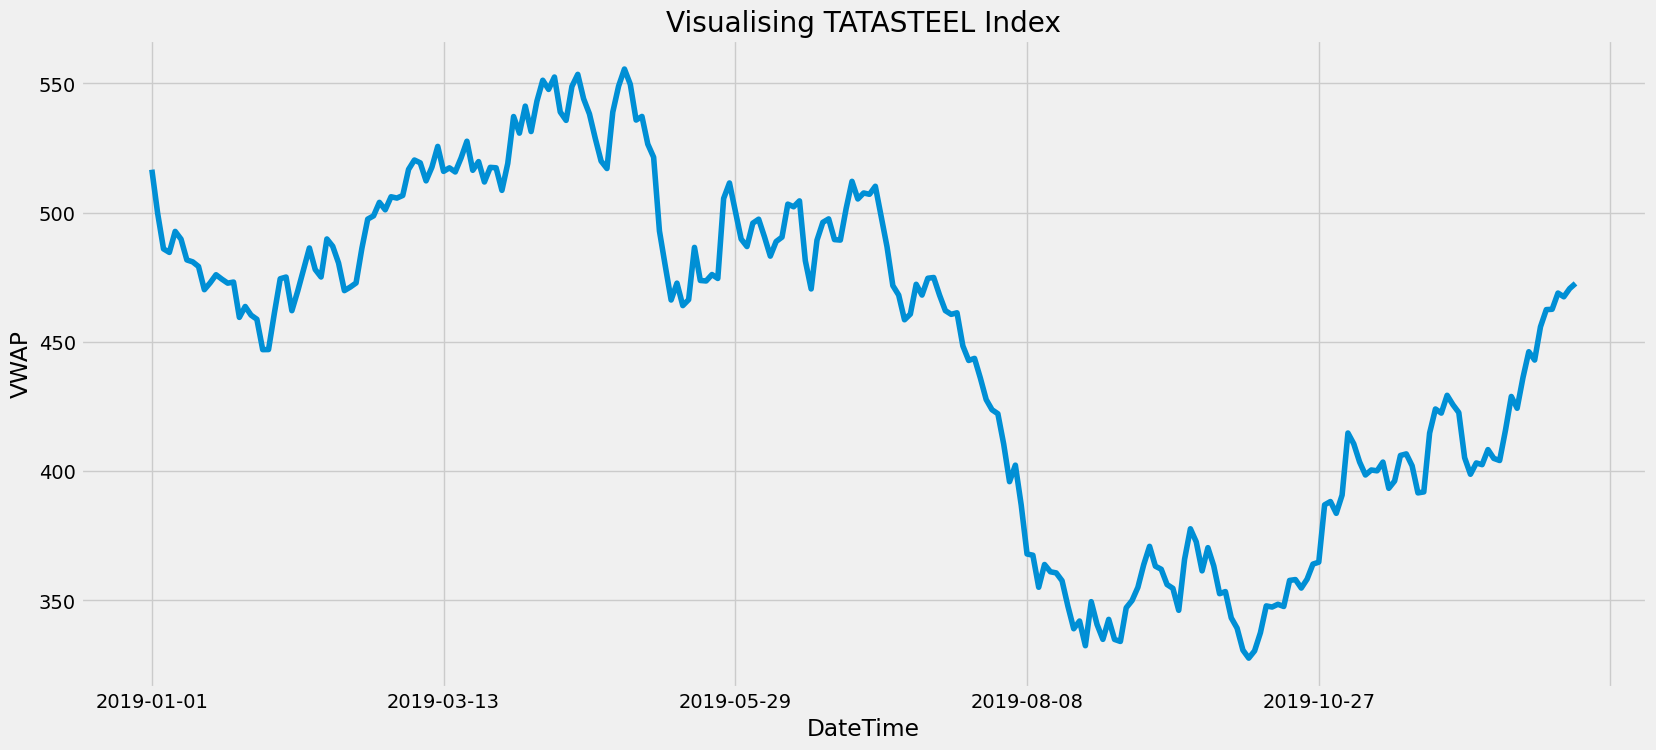

In [75]:
# Visualising the data helps us be more familiarised with the matter in hand
import matplotlib.pyplot as plt

# Divide data to train and test
year = 2019 # Changing in range 2000 - 2020
df_plot = df.loc[(df.index >= str(year)) & (df.index <str(year+1))]

# Change Plotting style
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize': (18,8)})

df_plot['VWAP'].plot( xlabel = 'DateTime', ylabel = 'VWAP', title= 'Visualising TATASTEEL Index')

# Introduction to Time Series
A time series is a sequence of observations taken *sequentially* in time. An intinsic feature of time series is that adjacent observations are *dependent*. (Time Series Forecasting and Control, George E. P. Box, et al., 2016)

In the realm of statistics, we often encounter two distinct types of time series data. The first is known as a **Regular Time Series**, characterised by observations that are systematically recorded at *consistent intervals* of time. The second type, an **Irregular Time Series**, is marked by observations that are *sporadically* recorded, with no adherence to a fixed time schedule.


In this particular discourse, our focus will be confined exclusively to the Regular Time Series. Therefore, any subsequent references to ‘time series’ within this notebook should be understood as pertaining solely to the Regular Time Series. For those seeking to expand their understanding of Irregular Time Series, I would recommend referring to the sources provided below.

*   A Survey on Priciples,Models and Methods for Learning from Irregularly- Sampled Time Series ([link](https://arxiv.org/abs/2012.00168))
*   Learning from Irregularly-Sampled Time Series: A Missing Data Prespective ([link](https://arxiv.org/abs/2008.07599))


# Data-Generating Process

Every time series is the product of a specific *mechanism*, a term statisticians often refer to as the **Data-Generation Process** or DGP. Given our limited access to perfect information about reality and the underlying DGP responsible for data creation, we are compelled to approximate the DGP. This approximation is what we commonly refer to as a **model**. Some general synthetic  time series DGPs are introduced in the following.

### White noise

An extreme case of stochastic process that generates a time series is a **white noise** process. It has a sequence of random numbers with zero meand and finite deviation.


Text(0.5, 1.0, 'White Noise')

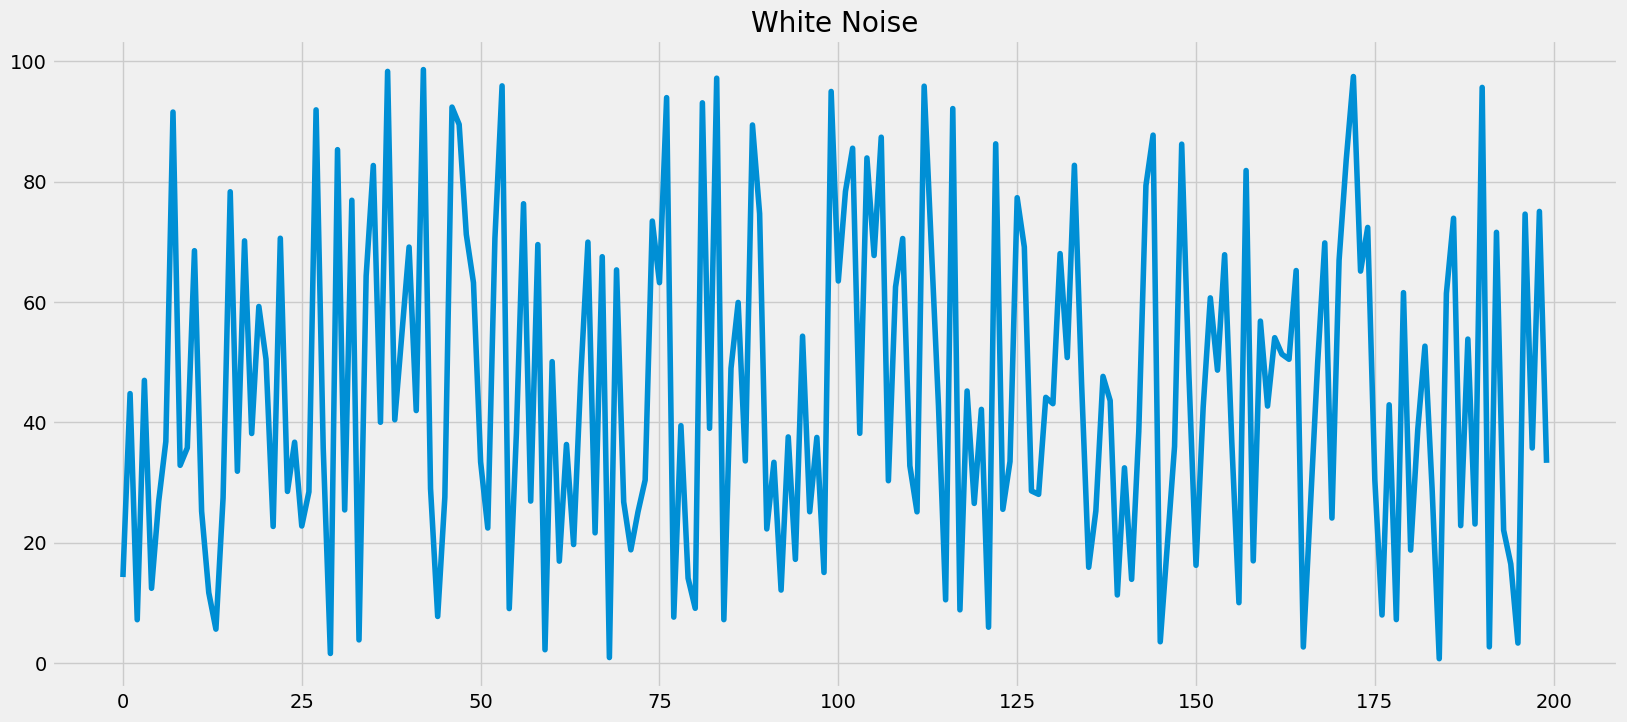

In [104]:
# Generate some time series using synthetic time series generation methods
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fast')
plt.rcParams.update({'figure.figsize': (18,8)})

# 1. White noise
steps = 200
time = np.arange(steps)
white_noise = np.random.rand(steps)*100
plt.plot(time,white_noise)
plt.title('White Noise')

### Red Noise
Red noise has constant mean and constant variance but is serially correlated in time, such that lag-1 autocorrelation between between two time steps has correlation coeffecient 'r' (Autocorrelation will be revisited). In the code snippet below, a red noise with r = 0.8 is implemented from the white noise that has been plotted in previous figure.

Text(0.5, 1.0, 'Red Noise')

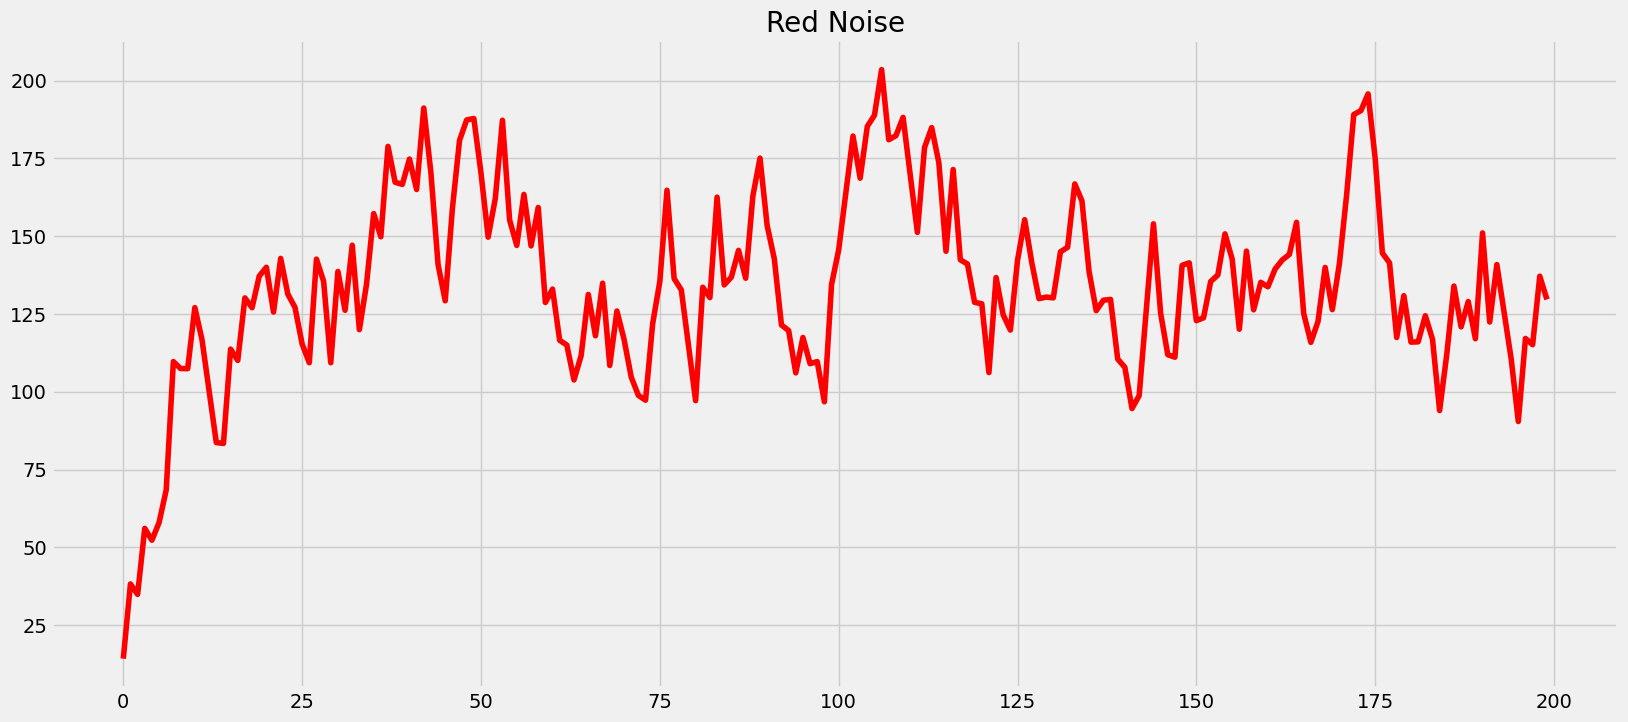

In [105]:
# 2. Red Noise
r = 0.8 # correlation coeffecient
red_noise = np.zeros(steps)
red_noise[0] = white_noise[0]
for i in range(1,200):
  red_noise[i] = red_noise[i-1]*r + np.sqrt(1-r**2)*white_noise[i]

plt.plot(time, red_noise ,color = 'r')
plt.title('Red Noise')

### Cyclical or seasonal signals
The crux of time series analysis lies in the identification of seasonal and cyclical patterns. The distinction between these two is subtle yet significant. Seasonal patterns are characterised by their completion of a cycle within a predefined time frame. In contrast, cyclical patterns are not confined to a specific duration. However, once initiated, they invariably undergo a full cycle.

Text(0.5, 1.0, 'Sinusoidal with amplitude 10 and frequency 0.02')

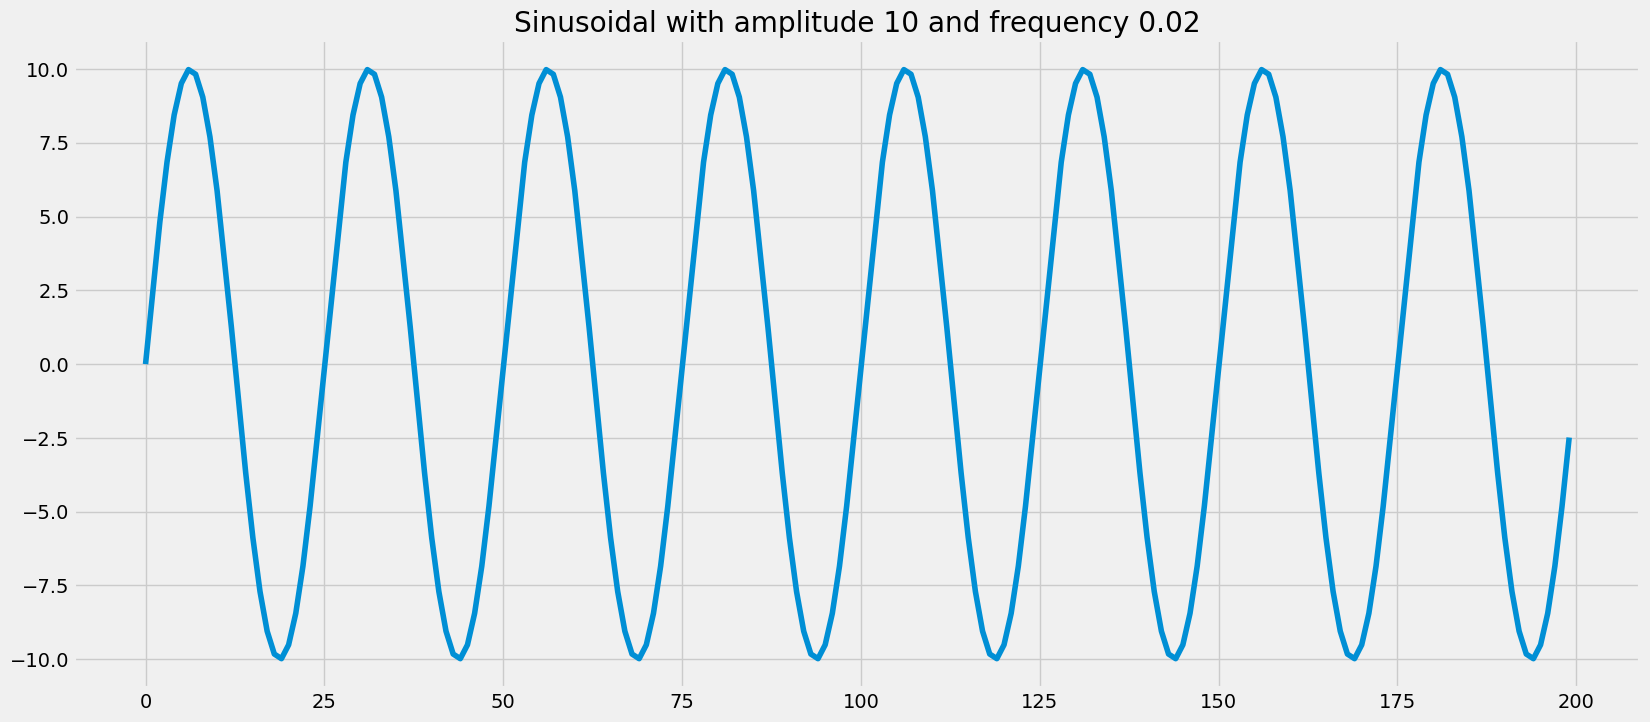

In [106]:
# 3. Cyclical signals
## sinosudal signal
frequency = 0.04
sin_signal = 10*np.sin(2*np.pi*frequency*time)
plt.plot(time,sin_signal)
plt.title('Sinusoidal with amplitude 10 and frequency 0.02')

Text(0.5, 1.0, 'Sinusoidal with amplitude 10 and frequency 0.02 + White noise with variance 4')

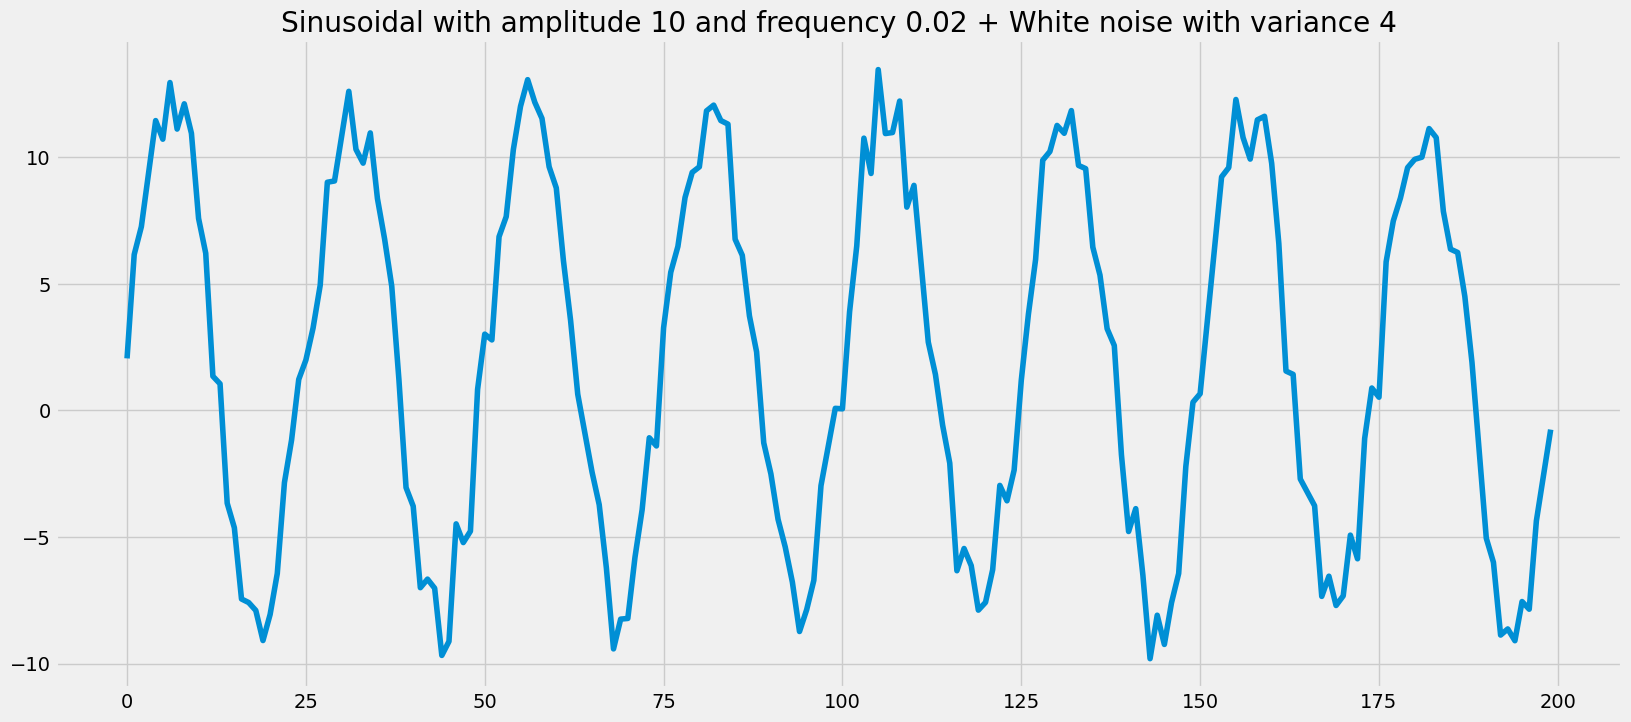

In [107]:
# Let's add some white noise to the sinusoidal signal!
sin_noisy = 10*np.sin(2*np.pi*frequency*time) + np.random.rand(steps)*4

plt.plot(time,sin_noisy)
plt.title('Sinusoidal with amplitude 10 and frequency 0.02 + White noise with variance 4')

### Autoregressive signals
Autoregressive signals hold paramount importance in the analysis of time series. As implied by the name, the value of these signals at a given time ‘t’ is contingent upon the values of the signal at preceding times, also known as ‘lagged’ times. These AR signals form the bedrock for ARMA and ARIMA models, which are predominantly utilised for time series prediction.
\begin{equation}
x_t = 0.9*x_{t-1} - 0.7 * x_{t-2} + ϵ
\end{equation}

Text(0.5, 1.0, 'Autoregressive signal')

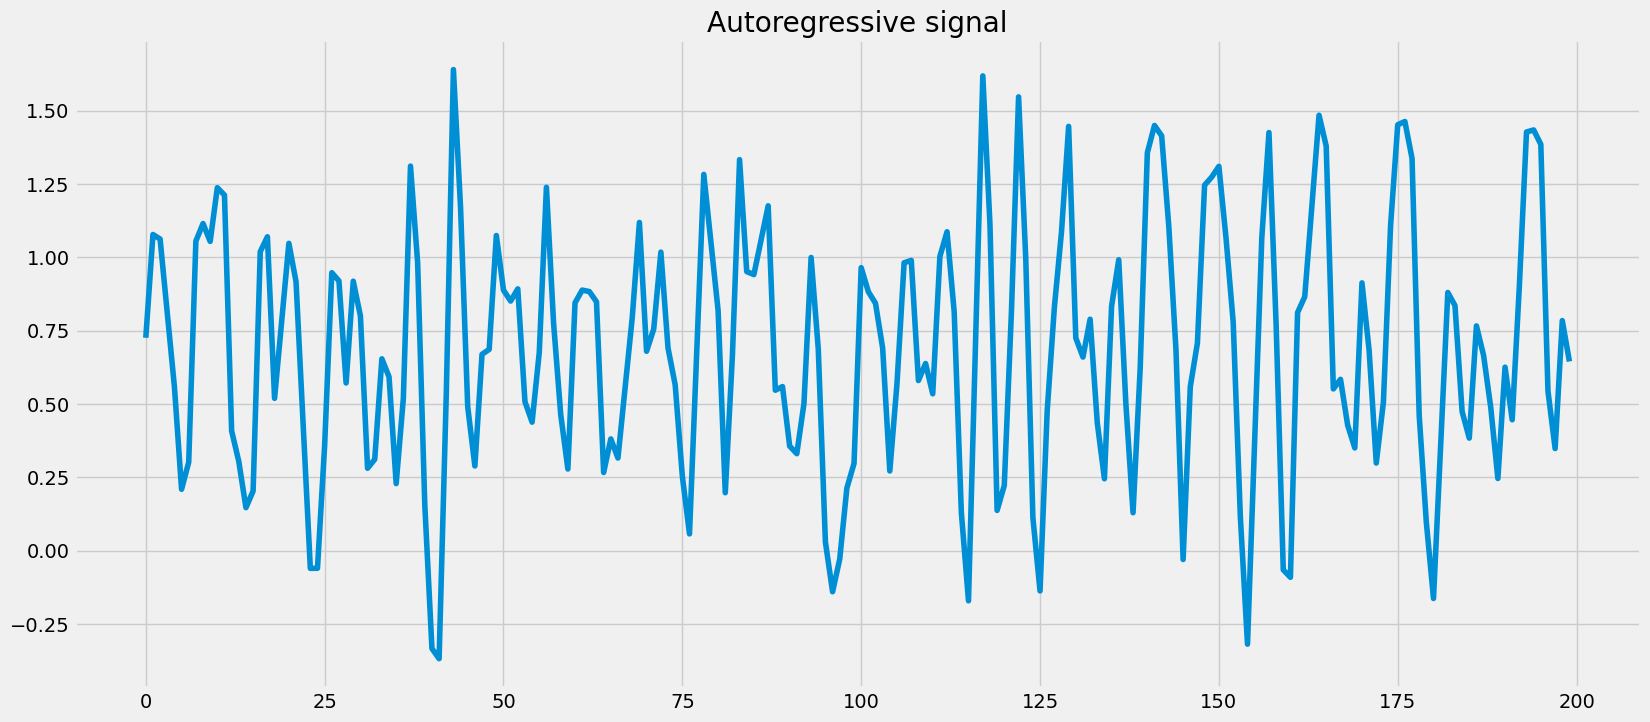

In [108]:
# 4.Autoregressive signals
AR_signal = np.random.rand(1)
AR_signal = np.append(AR_signal, 0.9* AR_signal +np.random.rand())
for t in range(2, steps):
  AR_signal = np.append(AR_signal , 0.9*AR_signal[t-1] - 0.6* AR_signal[t-2] + np.random.rand())

plt.plot(time,AR_signal)
plt.title('Autoregressive signal')

### Mixed signals

Text(0.5, 1.0, 'Mix it all toghether!')

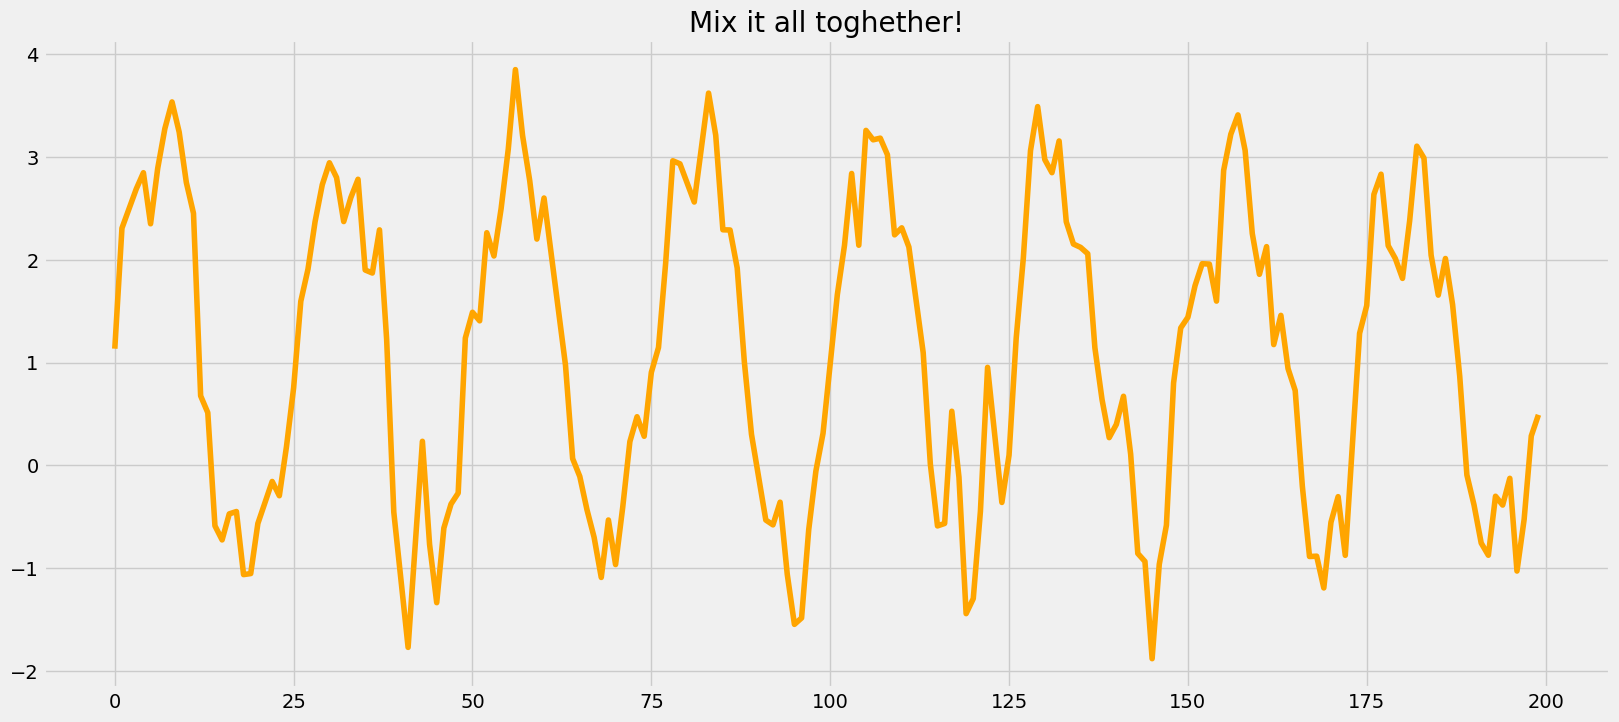

In [109]:
# 5. Mixed signals
mixed_signal = AR_signal + sin_noisy * 0.2

plt.plot(time, mixed_signal, color ='orange')
plt.title('Mix it all toghether!')

## Stationarity
A **stationary** time series is a time series which unconditional joint probablity distribution does not change in time. the **strict stationarity assumption** indicates that all statistical properties such as mean,variance, skewness, etc do not change with time. since this assumption is not practical, it is relaxed in favour of **weak stationarity assumption** where we stipulate that only the mean and variance of the time series do not change with time.

Text(0.5, 1.0, 'A non stationry signal')

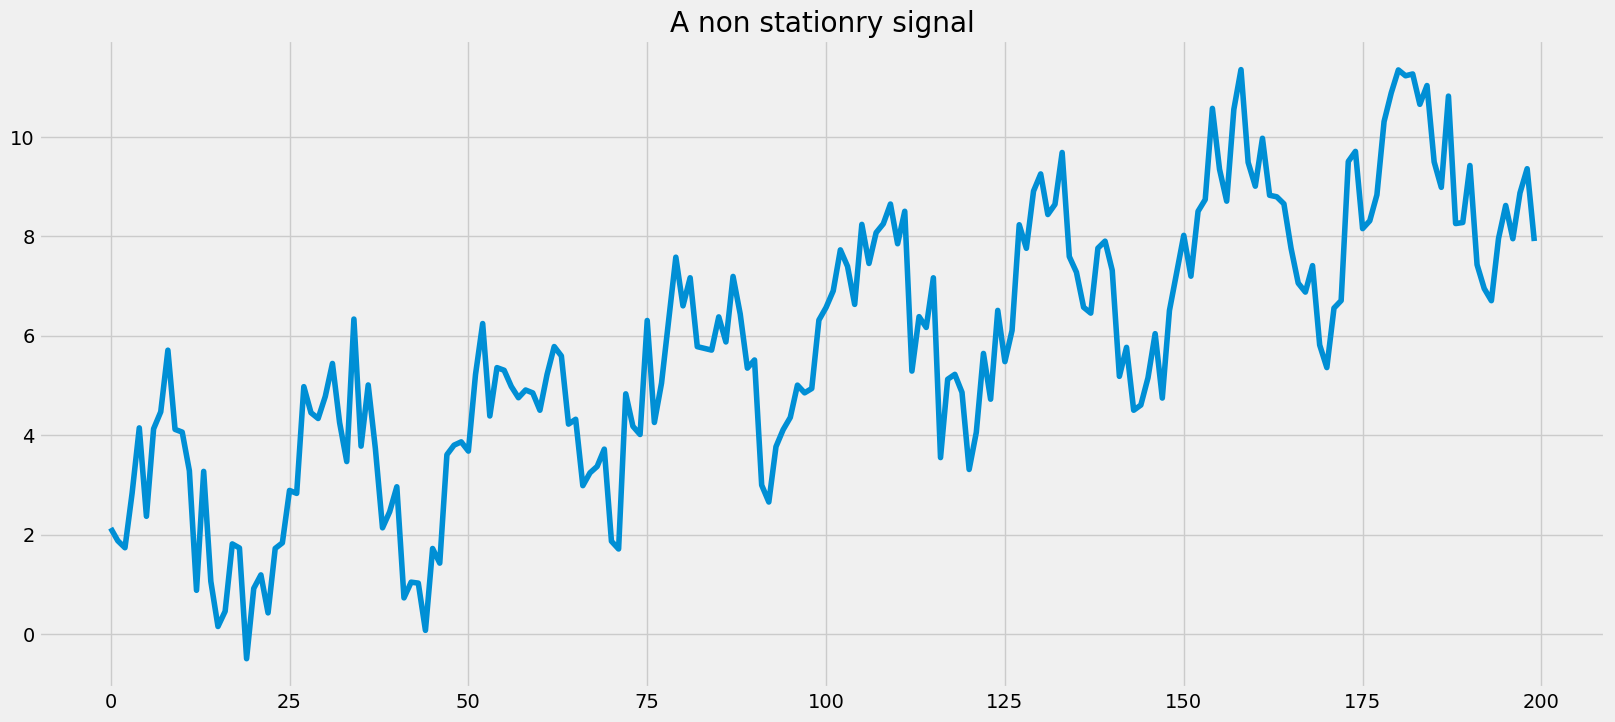

In [110]:
# 6. Non-stationary signal
non_stationary_signal = 0.2*sin_noisy + 0.04 * time + np.random.rand(200) * 3

plt.plot(time, non_stationary_signal)
plt.title('A non stationry signal')

# Linear Regression in Time Series
Linear regression is widely used in practice and adapts naturally to complex forecasting tasks. hence, linear regression will be the first model to use in the forecasting framework. linear regression algorithm learns how to make a weighted sum from its input features.
\begin{equation}
y_t = \prod_{i=1}^{n} w_{i,t} * f_{i,t} + b
\end{equation}
wich indicates that target is equal to product of weight and feature at each time t with *b* being simply a bias.

There are two kinds of feature unique to time series


*   **Time-step Features :** features that can be derived directly from the time index. the most basic is the time dummy which counts steps from begining to end.
*   **Lag Features :** shifting the observations of the target series such that they appear to have occured later in time, produces lag features.

Text(0.5, 1.0, 'Regression approximation for non stationary signal')

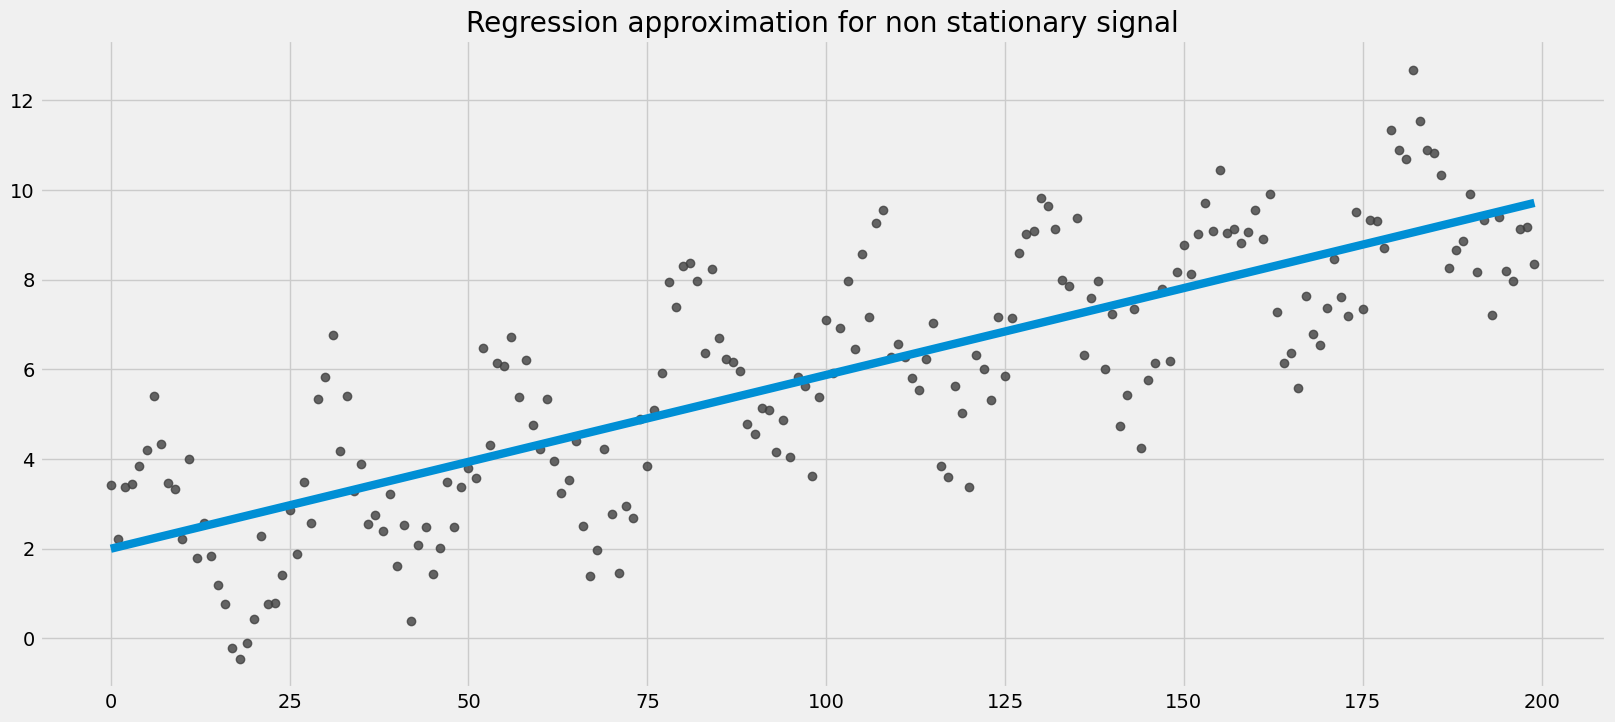

In [ ]:
import seaborn as sns

sns.regplot(x = time, y = non_stationary_signal, ci = None, scatter_kws = dict(color = '0.25'))
plt.title('Regression approximation for non stationary signal')

<Axes: title={'center': 'Visualising signal and prediction'}>

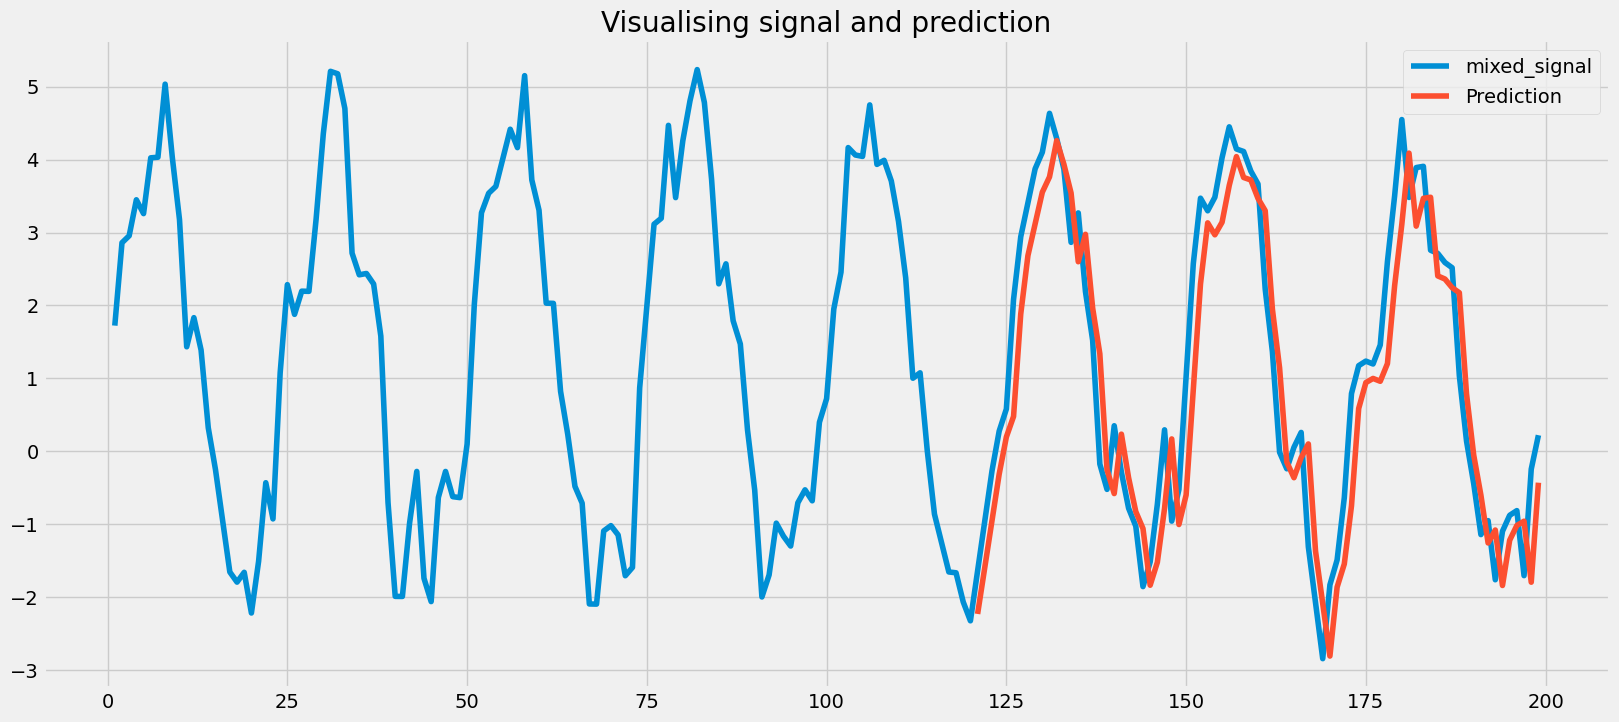

In [ ]:
# Fit a regression model on mixed data with lag feature and time feature
from sklearn.linear_model import LinearRegression

mixed_signal_dict = {'mixed_signal': mixed_signal, 'time_index' : time}

df_mixed = pd.DataFrame(data = mixed_signal_dict)
df_mixed['lag1'] = df_mixed['mixed_signal'].shift(1)

X = df_mixed.drop(columns= 'mixed_signal').dropna() # drop the main signal and shift the rest
y = df_mixed.loc[:,'mixed_signal'] # only the main signal (mixed signal in this case) is used as target
y,X = y.align(X,join = 'inner') # removes targets that lack features when lag term is used, one less data is available


# Make train-test data sets
X_train = X[:120]
y_train = y[:120]
X_test = X[120:]
y_test = y[120:]

#Create the model
model = LinearRegression()
model.fit(X_train,y_train) # fit the model
y_pred = pd.Series(model.predict(X_test), index = X_test.index, name = 'Prediction') # Predict for test inputs

y = pd.concat([y,y_pred],axis = 1) #combinee prediction and real data in a dataframe (out put dataframe)

y.plot(title = 'Visualising signal and prediction', legend = True) #plot the dataframe


In [ ]:
print('Bias: ',model.intercept_)
print('Cofeccients for each feature: ', model.coef_)

Bias:  0.3715726070393801
Cofeccients for each feature:  [-0.001414    0.91490851]



Employing linear regression has yielded fairly satisfactory outcomes. However, if we intend to venture into a real-time market, this model falls short of providing a profound understanding of the data. The incorporation of lag features will inevitably lead to a delayed forecast in linear models, signifying that one would only comprehend a shift in data post-occurrence.


###Feature Selection in Time Series Data

Incorporating each feature into the linear regression model triggers automatic computations, which either retain the introduced variables or render their coefficients insignificant, thereby suggesting that the given variable will not influence the target output. This holds true solely in the case of autoregression; in other instances, it may merely be a scaling issue, necessitating data normalisation. The inclusion of an excessive number of lag features can lead to data loss and burden the computer with the task of calculating each variable’s relation to the target output. To circumvent this, it is advisable to employ autocorrelation to utilise only the most crucial lag features. (Your dataframe should contain data from years mentioned)

# Autocorrelation
The key to successful prediction lies in whether past values of a series harbour information about future behaviour - in essence, if current values are contingent on the past. A swift - and consequently highly favoured - method of scrutinising this dependence is through the autocorrelation and partial autocorrelation functions.


**Correlation** indicates strength and direction of a linear relationshipe between two variables. **Autocorrelation**(ACF) is the correaltion between the values of a time series in successive periods. **Partial autocorrelation**(PACF) is similar to autocorrealtion except that it removes any indirect correlationship that may be present before presenting the correaltions. For instance, if time series at time steps  ($t-1$) are highly correalted with series at ($t$), by extending this logic, ($t-2$) is also highly correalted to ($t-1$) and because of that correaltion between ($t$) and ($t-2$) would also be high. however, partial autocorrealtion would correct this dependence and extracts the pure correlation between ($t$) and ($t-2$). Autocorrelation and partial auto correlation works only if the time series is <u>stationary</u>!
<br/>
<br/>

If we assume that mean of a time series such as $X_t$ is $\mu_t = E\{X_t\}$ then autocovariance of a time series is calculated as below
\begin{equation}
\gamma_{(t,t+u)} = Cov(X_t,X_{t+u}) = E\{X_t X_{t+u}\} - E\{X_t\} E\{X_{t+u}\}
\end{equation}
where u is the lag term and $ u \in \mathbb{Z} $. then autocorrelation function (or ACF for abbreviation) can be calculated by
\begin{equation}
\rho_{(t,t+u)} = Cor(X_t,X_{t+u}) =\frac{Cov(X_t,X_{t+u}}{Var\{X_t\}Var\{X_{t+u}\}}
\end{equation}

then partial autocorrelation function is defined mathematically as below
\begin{equation}
\phi_{(u)} = Cor(X_t,X_{t+u}|X_{t+1},...,X_{t+u-1})
\end{equation}

Let's just quickly apply the ACF and PACF on our non stationary but complicated signal, the mixed signal!


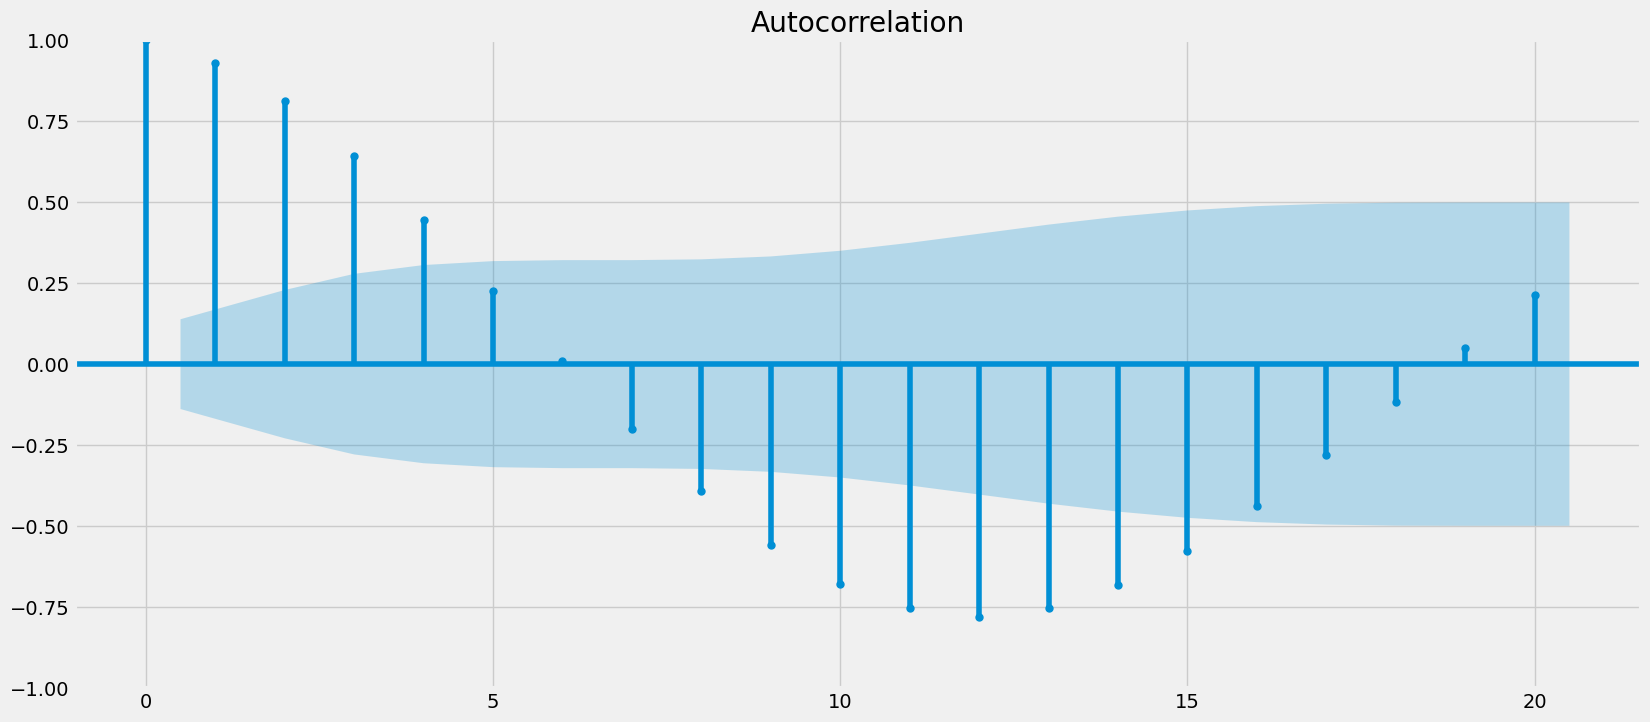

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_mixed['mixed_signal'], lags = 20);

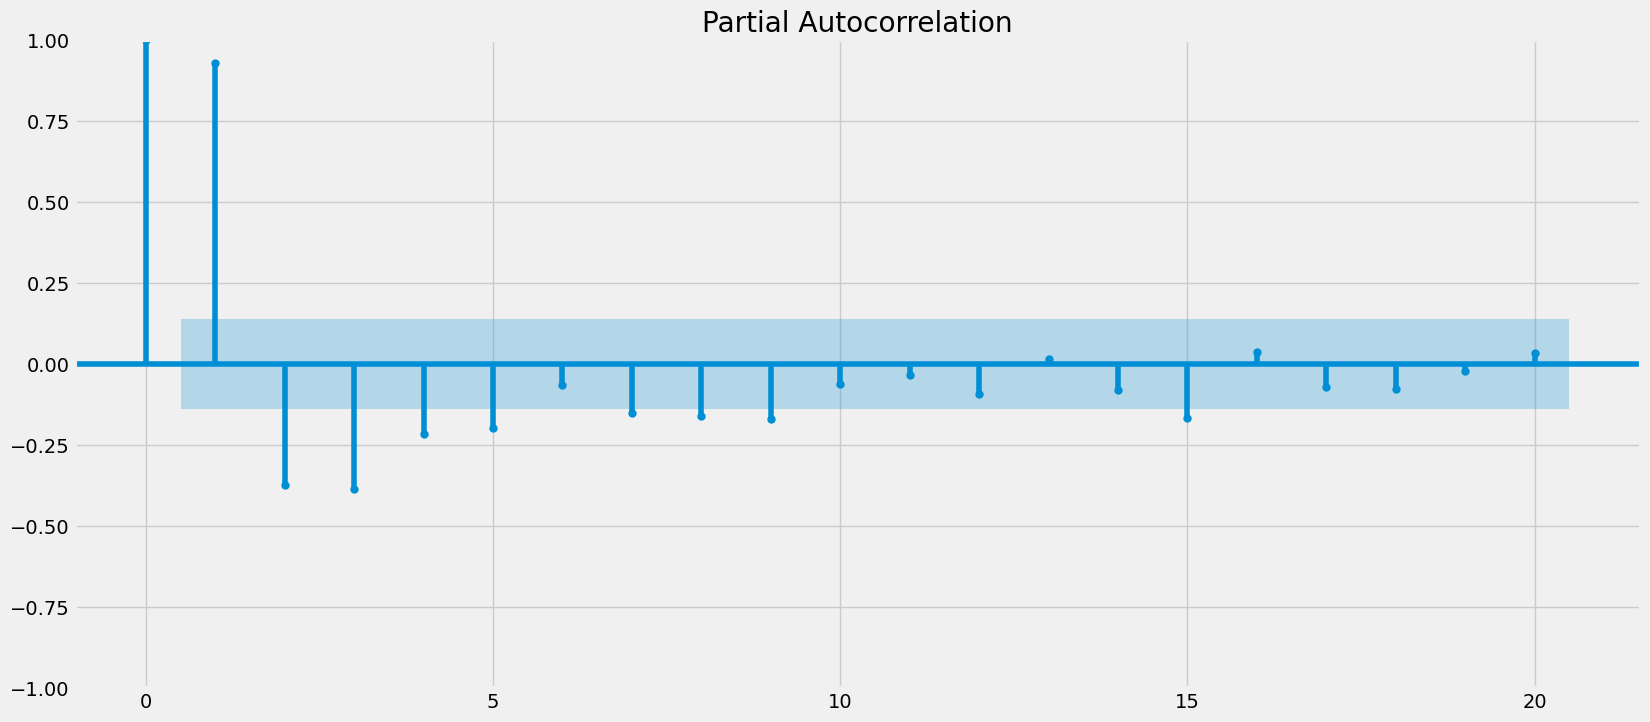

In [ ]:
plot_pacf(df_mixed['mixed_signal'], lags = 20);

PACF correctly shows that the first and second lag has the closest linear relation with the data while PAC tries to capture the seasonality either.

---
**Excercise 1**

Implement the linear regression model on the TATA Steel index for the years 2018 and 2019, utilising significant lag features and the time feature. Illustrate the forecast and disclose the coefficients of the variables along with the intercept

---


#Nonstationary data

The concepts of stationarity and weak stationarity have already been introduced. Here, two important questions about non-stationary time series are scrutinised:

1. How can one determine whether a time series is stationary or not?
2. Is it possible to forecast a non-stationary time series?

There are several ways to ascertain the stationarity of a time series. The simplest method is to divide the entire series into two and measure their mean and variance. If these statistical properties are not similar, then the series is non-stationary. Otherwise, the test does not provide any information about the stationarity of the series. In fact, statistical tests do not accept a hypothesis; they only fail to reject it.

In addition to the standard statistical tests, there are more formal methods available to assess the stationarity of a time series. The most well-known of these is the **Augmented Dickey-Fuller test (also known as the ADF test)**, which is a type of statistical hypothesis test. If the p-value is greater than 0.05, the null hypothesis is rejected, indicating that the series is non-stationary. There are also other tests for stationarity, including but not limited to:

* Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
* Phillips-Perron (PP)

As for the second question, there are several strategies to convert a non-stationary series into a stationary one for forecasting purposes. While some methods (such as exponential smoothing in time series analysis) do not require this transformation, the majority of forecasting techniques necessitate stationarity for their application. Some methods to transform a non-stationary series into a stationary one include:

  1. Differencing the series
  2. Decomposing the series
  3. Taking the log of the series
  4. Power transformers

In the next chapter, Decomposing the series will be discussed.

In [ ]:
split_point = len(df_mixed)//2
df_split = pd.DataFrame({
    'First_half': df_mixed.loc[:split_point-1,'mixed_signal'].values,
    'Second_half': df_mixed.loc[split_point:,'mixed_signal'].values})
print('Mixed Signal Status:')
print(f"Mean of the first half is {df_split['First_half'].mean()} and the mean of the second half is {df_split['Second_half'].mean()}.")
print(f"Variance of the first chunck is {df_split['First_half'].var()} and the variance of the second half is {df_split['Second_half'].var()} \n")

# Hence the test could not be rejected, Let's test our nonstationary signal with a trend

split_point = len(non_stationary_signal)//2
df_split['First_half'] = non_stationary_signal[:split_point]
df_split['Second_half'] = non_stationary_signal[split_point:]

print('Nonstationary Signal Status:')
print(f"Mean of the first half is {df_split['First_half'].mean()} and the mean of the second half is {df_split['Second_half'].mean()}.")
print(f"Variance of the first chunck is {df_split['First_half'].var()} and the variance of the second half is {df_split['Second_half'].var()}")

# Difference in the mean clearly proves the nonstationarity of this signal

Mixed Signal Status:
Mean of the first half is 3.0696430999673625 and the mean of the second half is 3.2413364867573566.
Variance of the first chunck is 4.170742082628256 and the variance of the second half is 6.17617064083969 

Nonstationary Signal Status:
Mean of the first half is 30.659955741650293 and the mean of the second half is 81.08400992341542.
Variance of the first chunck is 206.0578384401957 and the variance of the second half is 214.58873381536978


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(non_stationary_signal)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print('Critical Values:')
for key,value in adf_result[4].items():
  print(f'{key}: {value}')

ADF Statistic: 0.010625586836389226
p-value: 0.9594020429303253
Critical Values:
1%: -3.466398230774071
5%: -2.8773796387256514
10%: -2.575213838610586


# Components of Time Series
Any time series can contain some or all of the following components


*   **Trend** ($T_t$) : The trend shows a general direction of time series over a long period of time. It represents a long-term progression of the series
*   **Seasonal** ($S_t$) : seasonal component is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors: annual,monthly or weekly.like daily power consumption patterns or annual sales of seasonal goods.
*   **Cyclical** ($C_t$) : cycilcal component is a repetitive pattern which does not occur at fixed intervals.It usually happens in econimic context like economic recession which happens over a 10-year cycle but it won't happen like clockwork!
*   **Irregular** ($I_t$) : The fluctuations in time series which happens when other components are detected and removed.

Depending on the nature of the time series, components can be mixed in two general ways to compose the time series


1.   **Additive** time series
\begin{equation}
X_t = T_t + S_t + C_t + I_t
\end{equation}
2.   **Multiplicative** time series
\begin{equation}
X_t = T_t * S_t * I_t
\end{equation}


# Decomposing a time series

Seasonal decomposition is the process by which we deconstruct a time series into its components - typically, trend seasonality and residuals.

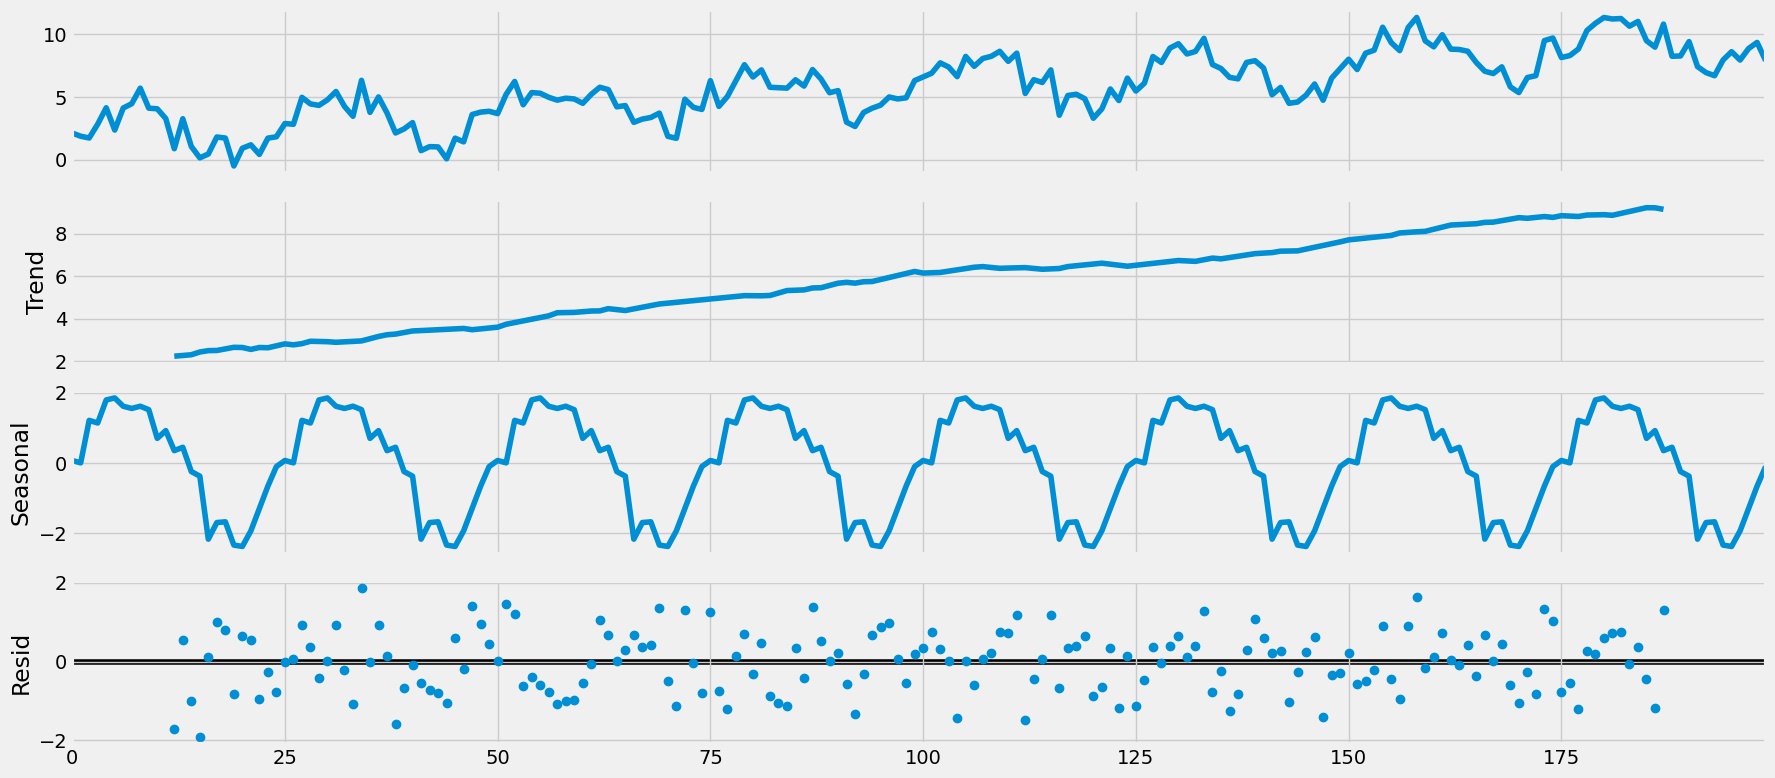

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_non_stationary = pd.DataFrame({
    'data': non_stationary_signal})

#period is 25 because frequency of the sine wave is choosen to be 0.04 Hz
decomposition = seasonal_decompose(df_non_stationary, period = 25) # other parameters are default values: model = 'Additive'
decomposition.plot();

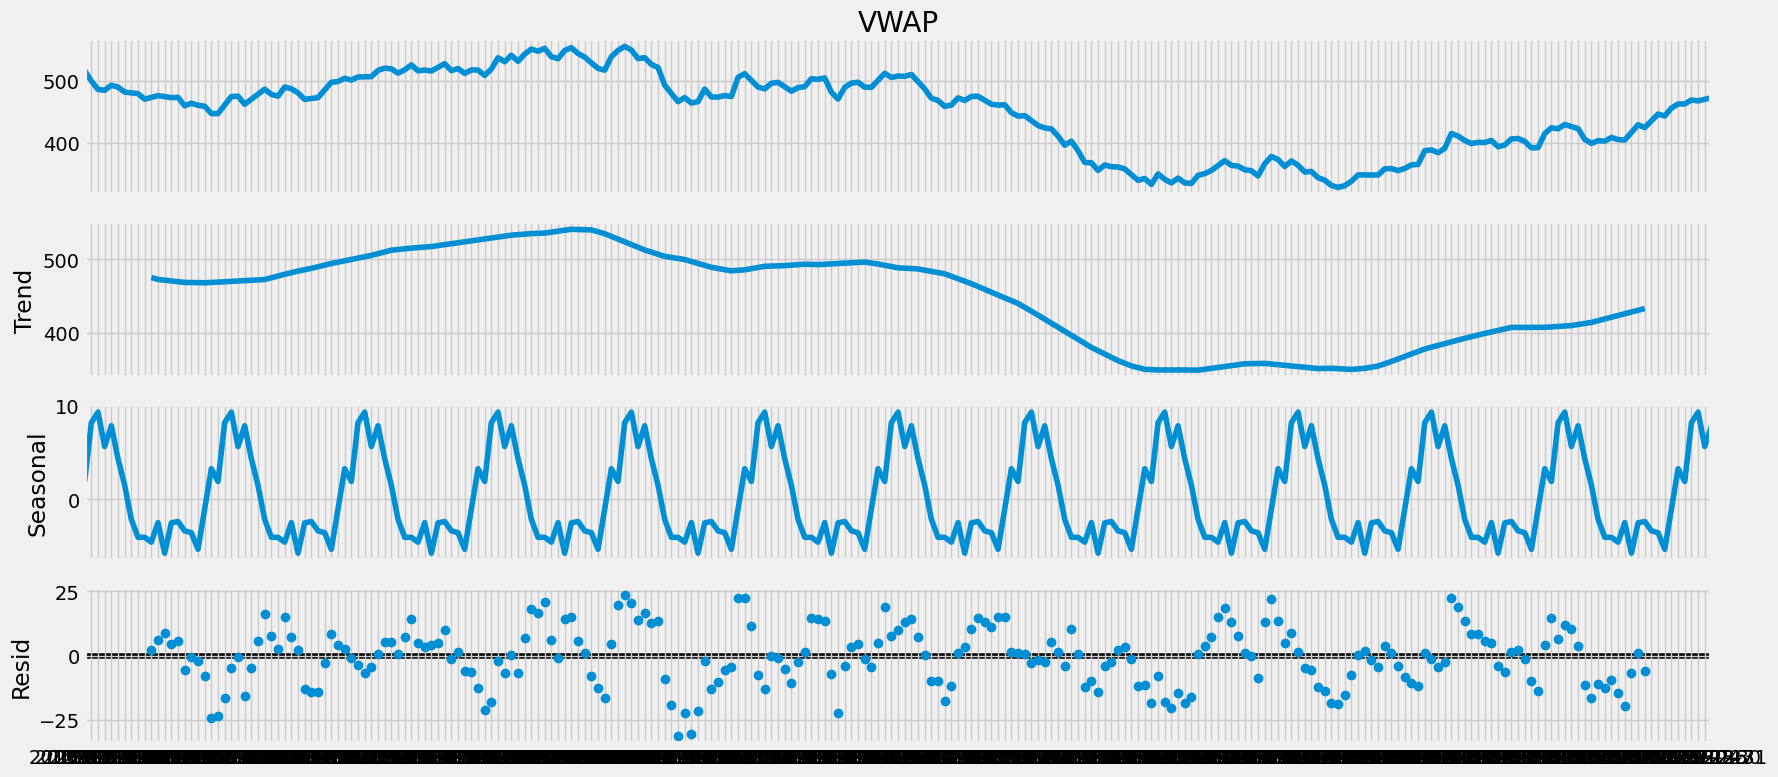

In [119]:
decomposition = seasonal_decompose(df_plot['VWAP'],period = len(df_plot)//12)
figure = decomposition.plot()

## Detrending Transform

The trend component of a time series represents a persistent, long-term change in the mean of the series. The trend is the slowest-moving part of a series, the part representing the largest time scale of importance. In a time series of product sales, an increasing trend might be the effect of a market expansion as more people become aware of the product year by year.



### Moving Averages

<Axes: xlabel='Date'>

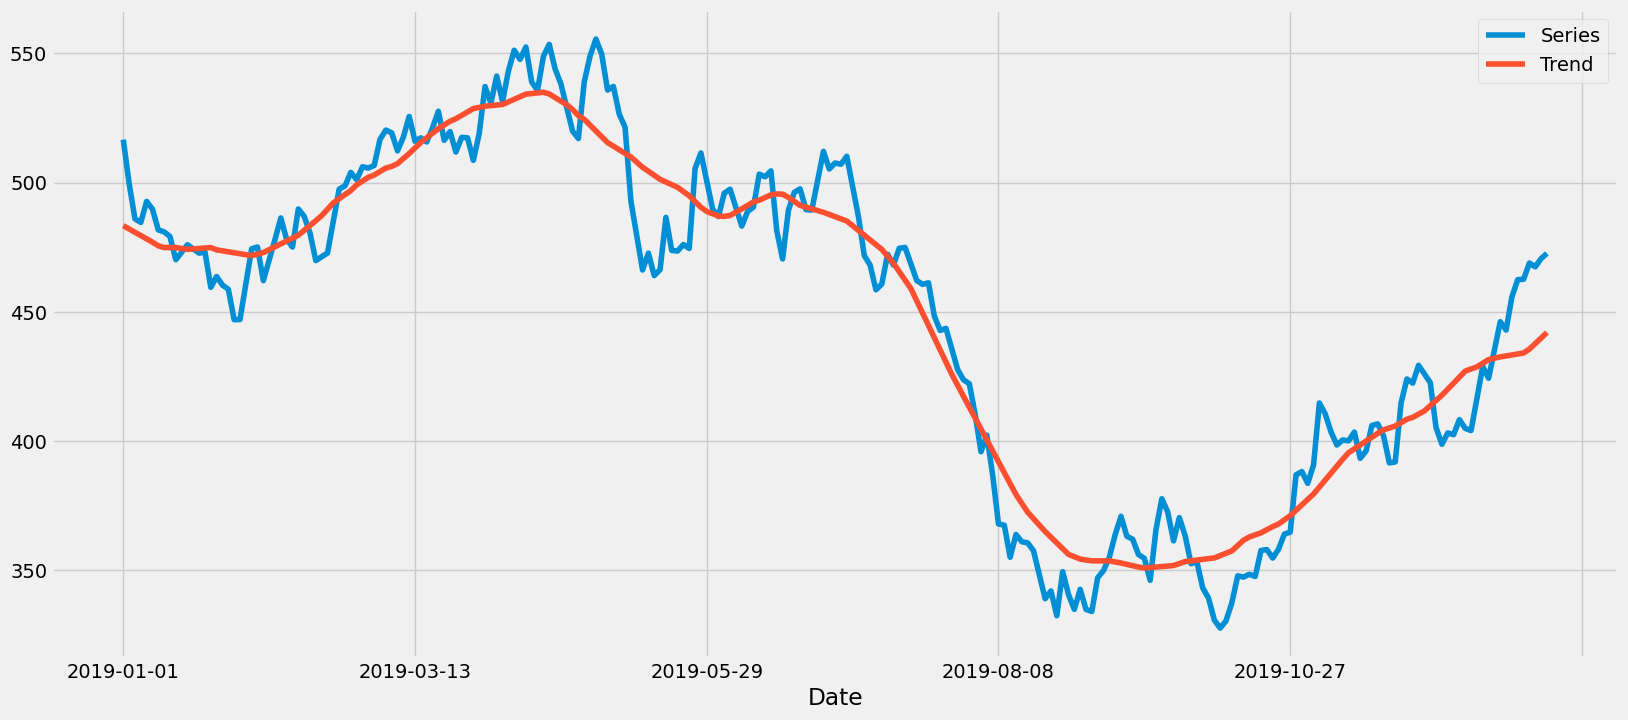

In [115]:
# From Here on, we'll take a look back at our data for the year 2018 which is saved in df_plot
df_VWAP = pd.DataFrame({'Series' : df_plot['VWAP'].values}, index = df_plot.index)
df_VWAP['Trend'] = df_VWAP['Series'].rolling(window = 30, center = True, min_periods = 15).mean()
items = len(df_VWAP)
df_VWAP['step'] = range(items)

split_date = '2019-10'  #Date that splits avaiable data against the upcoming data
X_avb = df_VWAP.loc[:split_date].copy()
X_pred = df_VWAP.loc[split_date:].copy()



df_VWAP.drop(columns='step').plot()

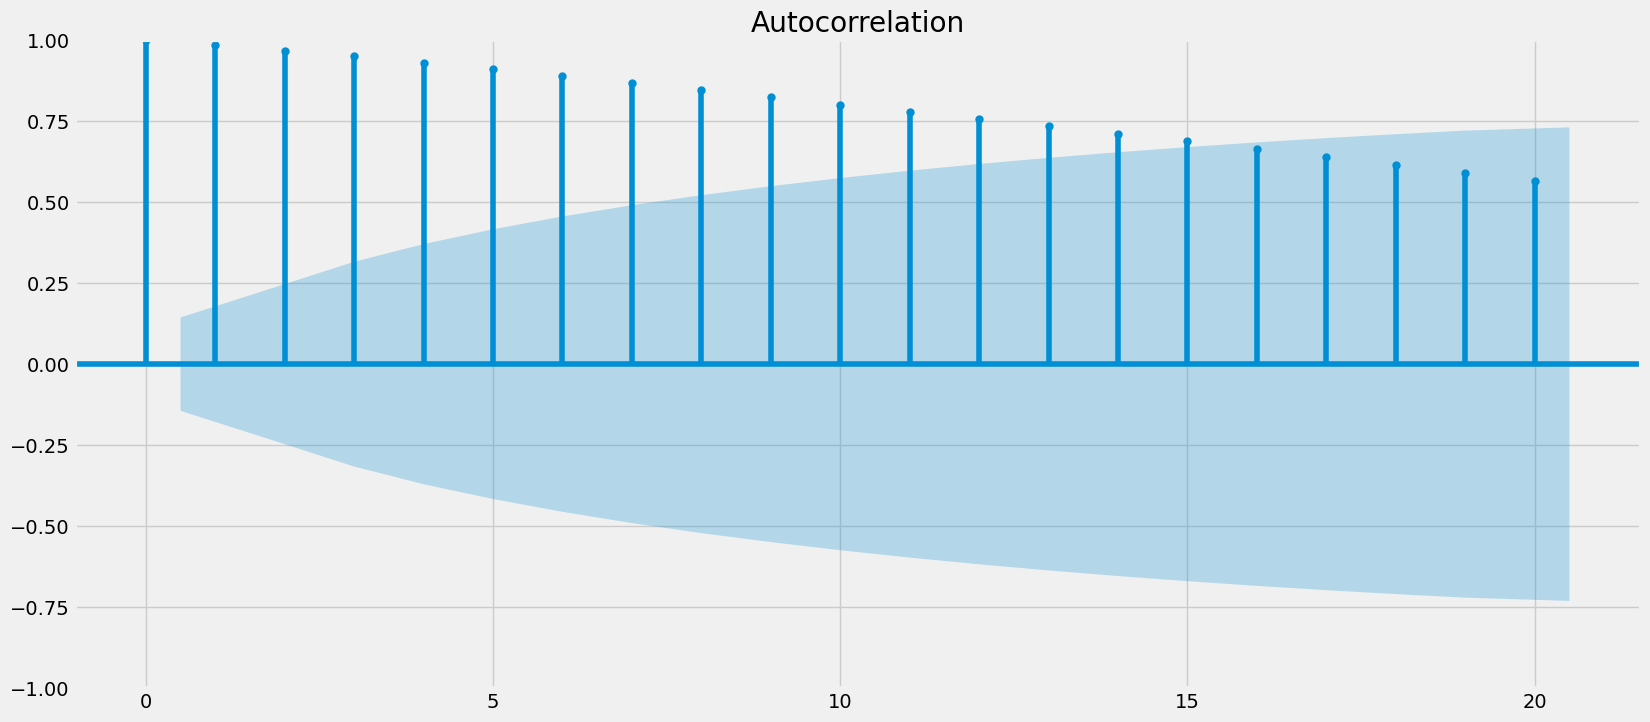

In [ ]:
plot_acf(X_avb['Trend'], lags= 20);

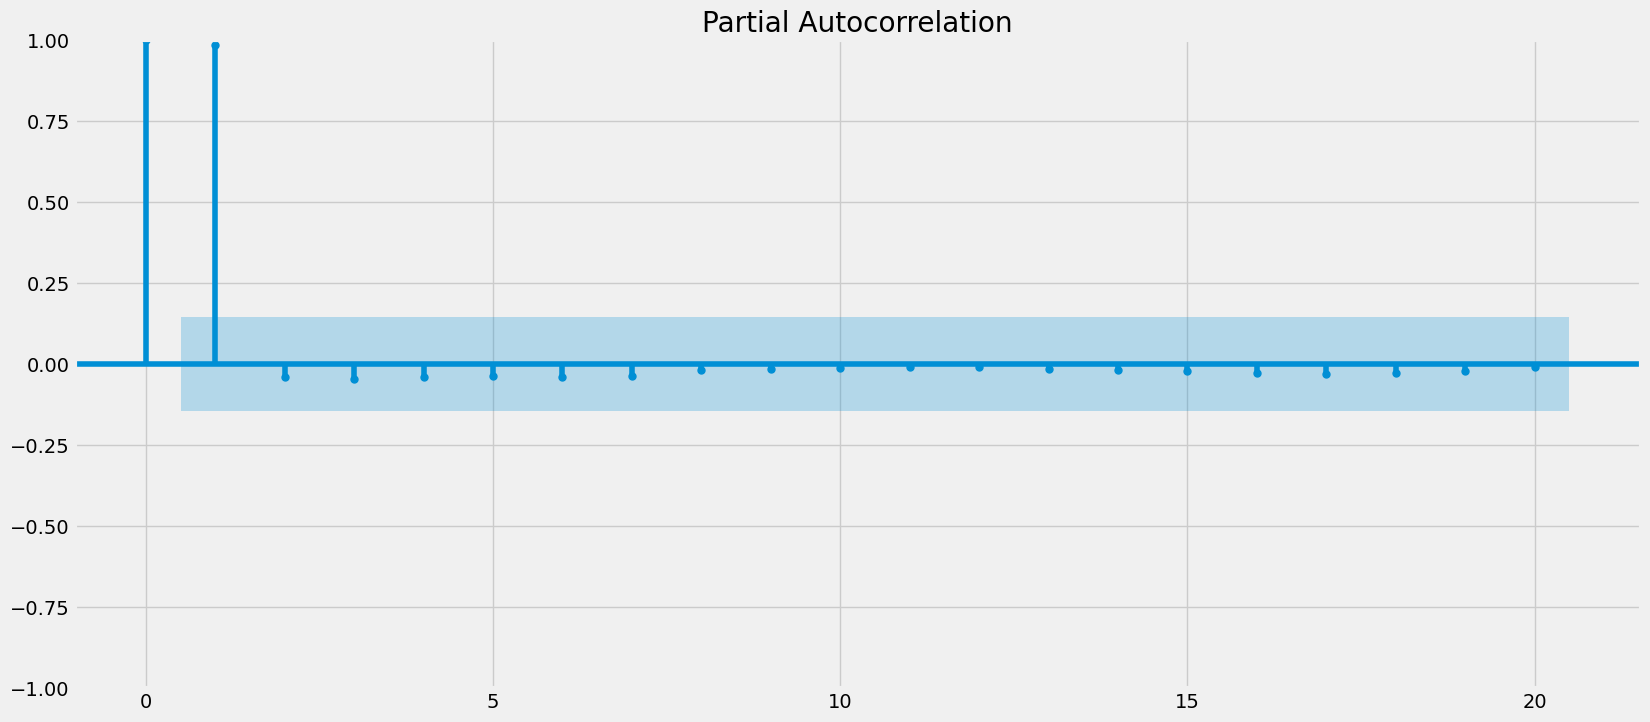

In [ ]:
plot_pacf(X_avb['Trend'],lags = 20);

In [122]:
X_avb['Lag1T'] = X_avb['Trend'].shift(1)
X_reg = X_avb.iloc[1:items-1]
X_pred['Lag1T'] = X_pred['Series'].shift(1) # The new column can't be Lag1 of Trend! Requires correction since we don't have the future data yet.
X_pred.iloc[0,3] = X_avb.iloc[-1,1]

In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_reg.loc[:,['step','Lag1T']],X_reg['Trend'])

X_pred['Prediction'] = model.predict(X_pred.loc[:,['step','Lag1T']])

<Axes: xlabel='Date'>

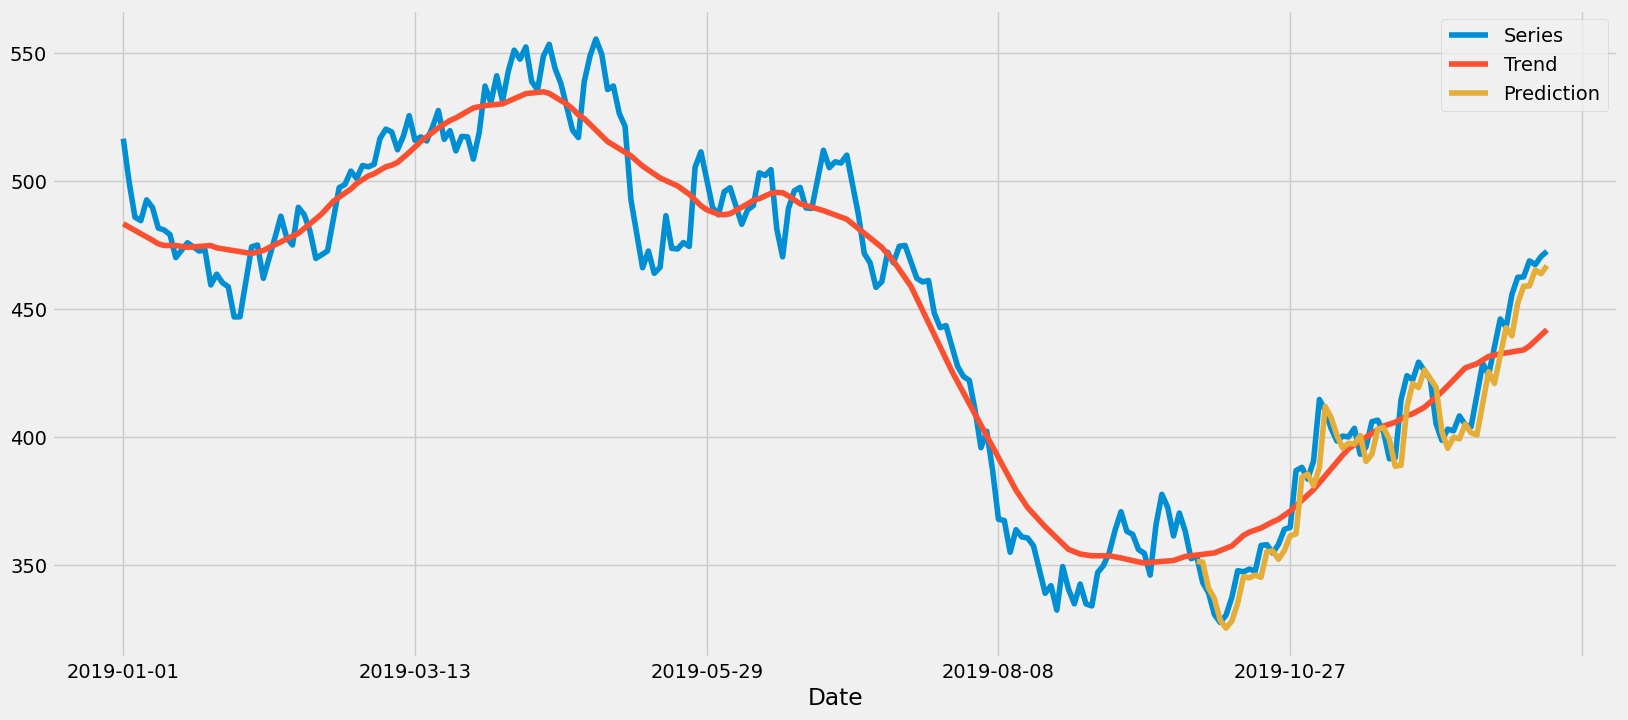

In [124]:
df_VWAP['Prediction'] = X_pred['Prediction']
df_VWAP.loc[:,['Series','Trend','Prediction']].plot()

In [ ]:
print('Bias: ',model.intercept_)
print('Cofeccients for each features [ step, lag]: ', model.coef_)

Bias:  -2.3637057312752177
Cofeccients for each features [ step, lag]:  [0.02108405 0.99917049]


<h2>NOTE : TREND CAN ONLY ACCEPT TIME STEP FEATURES</h2>

EXCLUDE THE LAG FEATURES

In [120]:
# So it is only meaningful to find a relation between time step and trend
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(order = 4,index = X_avb.index)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps = len(X_pred))


model = LinearRegression()
model.fit(X,X_avb['Trend'])

X_pred['forecast'] = model.predict(X_fore)
X_avb['fitted'] = model.predict(X)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [121]:
X

trend  trend_squared  trend_cubed      trend**4
Date                                                       
2019-01-01    1.0            1.0          1.0  1.000000e+00
2019-01-02    2.0            4.0          8.0  1.600000e+01
2019-01-03    3.0            9.0         27.0  8.100000e+01
2019-01-04    4.0           16.0         64.0  2.560000e+02
2019-01-07    5.0           25.0        125.0  6.250000e+02
...           ...            ...          ...           ...
2019-09-24  180.0        32400.0    5832000.0  1.049760e+09
2019-09-25  181.0        32761.0    5929741.0  1.073283e+09
2019-09-26  182.0        33124.0    6028568.0  1.097199e+09
2019-09-27  183.0        33489.0    6128487.0  1.121513e+09
2019-09-30  184.0        33856.0    6229504.0  1.146229e+09

[184 rows x 4 columns]

<Axes: xlabel='Date'>

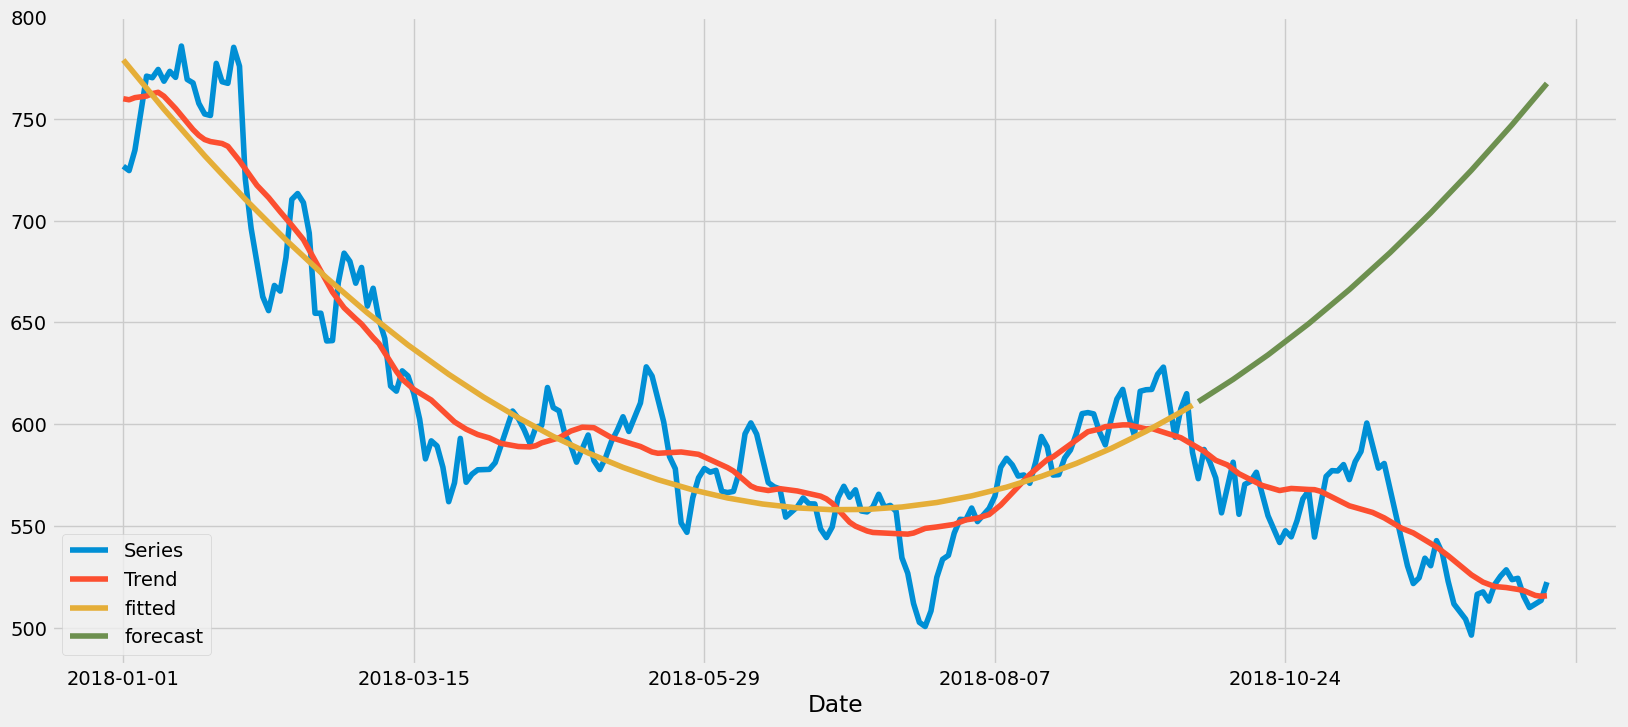

In [ ]:
df_VWAP['forecast'] = X_pred['forecast']
df_VWAP['fitted'] = X_avb['fitted']
df_VWAP.loc[:,['Series','Trend','fitted','forecast']].plot()

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(order = 1,index = X_avb.index)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps = len(X_pred))


model = LinearRegression()
model.fit(X,X_avb['Trend'])

X_pred['forecast'] = model.predict(X_fore)
X_avb['fitted'] = model.predict(X)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Axes: xlabel='Date'>

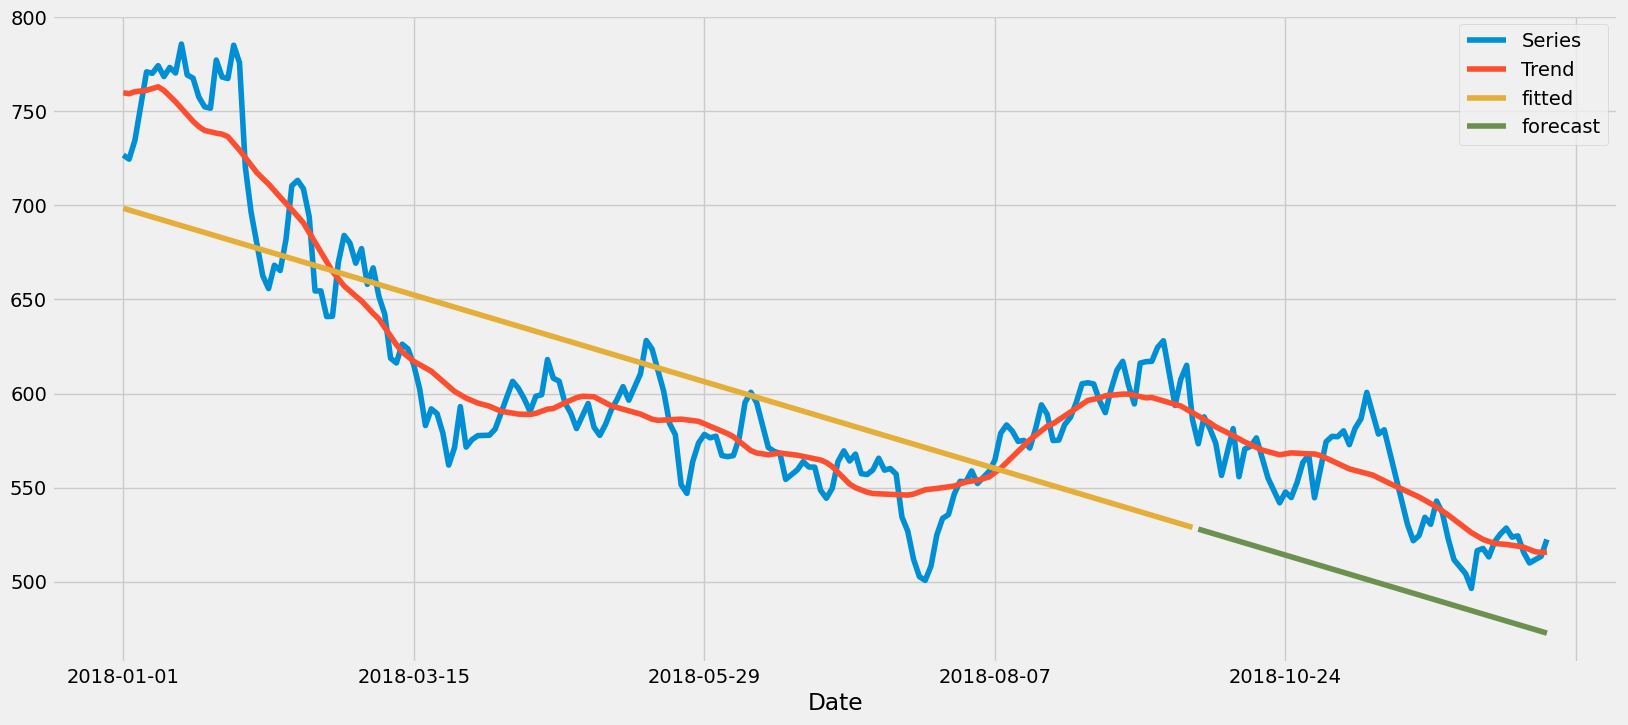

In [ ]:
df_VWAP['forecast'] = X_pred['forecast']
df_VWAP['fitted'] = X_avb['fitted']
df_VWAP.loc[:,['Series','Trend','fitted','forecast']].plot()

Hence the linear model can predict the trend of the series much closer!

---

Excersise:

Detrend the TATA Steel index for the year 2019, utilising data up until the month of June, and forecast the Volume Weighted Average Price (VWAP) of the index for the remainder of the year.

---

## *FYI: Deterministic Trend Vs. Stochastic Trend
CConsider an AR model in which the current data is solely related to the preceding data (akin to red noise), as demonstrated in the following model:

\begin{equation}
x_t = \phi \times x_{t-1} + ϵ_t ; \epsilon_t \in \mathcal{N}(0,\sigma^2)
\end{equation}

In this scenario, there are three potential outcomes for the constant of the lag term, denoted as $\phi$

*   if $\phi > 1$ A trend will manifest in the series
*   if $\phi = 1$ it is called **unit root**
*   if  $\phi < 1$ then

While the previously synthesised time series, referred to as the “mixed signal”, exhibited a deterministic trend, the AR signal with ϕ>1 displays a stochastic trend.

This example will illustrate the difference
\begin{equation}
x_t = 1.5 x_{t-1} - 0.5 x_{t-2} + ϵ
\end{equation}

Text(0.5, 1.0, 'Autoregressive signal')

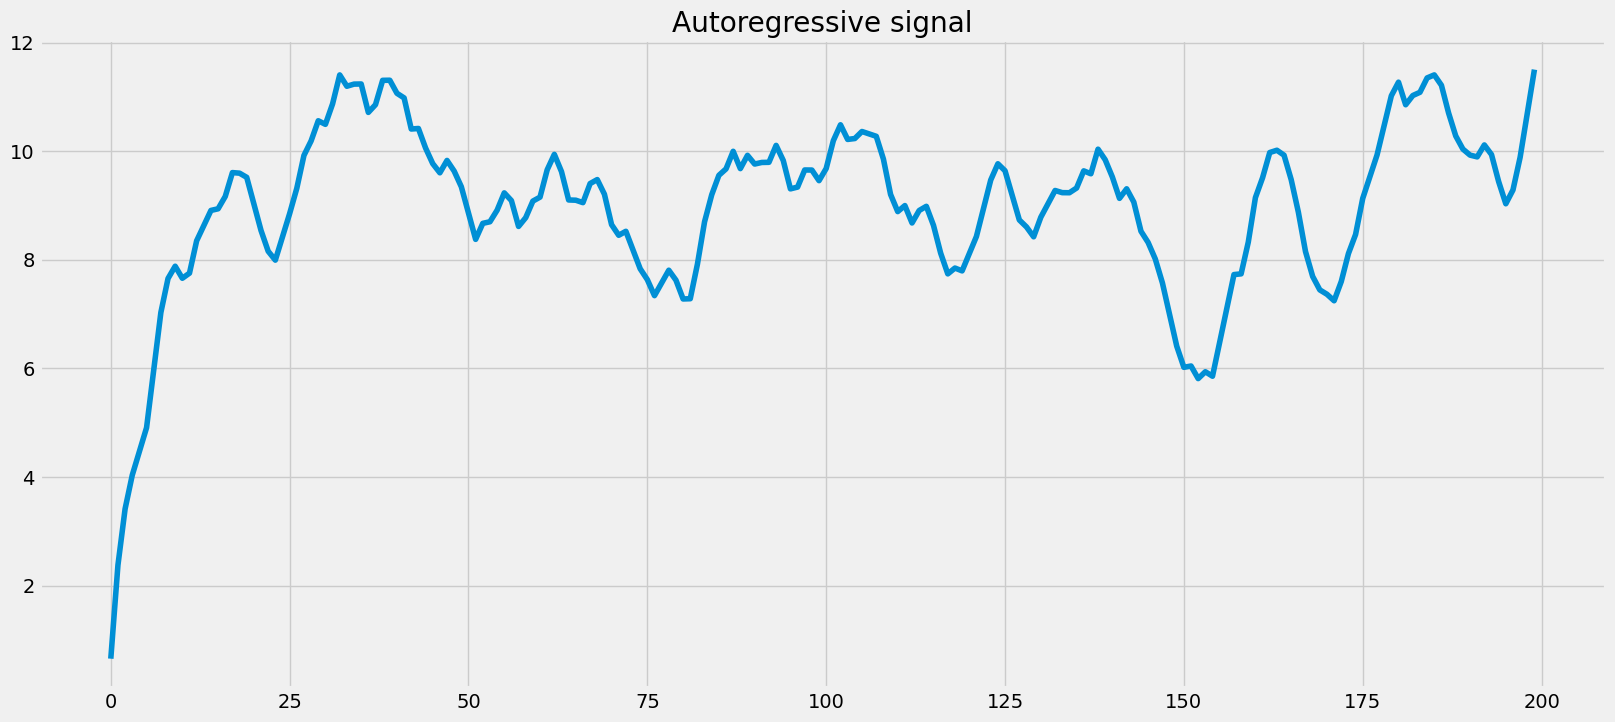

In [ ]:
# 6.Autoregressive signals Revisited
AR_signal = np.random.rand(1)
AR_signal = np.append(AR_signal, 3.6* AR_signal +np.random.rand())
for t in range(2, steps):
  AR_signal = np.append(AR_signal , 1.5*AR_signal[t-1] - 0.55* AR_signal[t-2] + np.random.rand())

plt.plot(time,AR_signal)
plt.title('Autoregressive signal Revisited')

## Deseasonalising Transform
We say that a time series exhibits seasonality whenever there is a regular, periodic change in the mean of the series. Seasonal changes generally follow the clock and calendar -- repetitions over a day, a week, or a year are common. Seasonality is often driven by the cycles of the natural world over days and years or by conventions of social behavior surrounding dates and times.

Fourier features are pairs of sine and cosine curves, one pair for each potential frequency in the season starting with the longest. Fourier pairs modeling annual seasonality would have frequencies: once per year, twice per year, three times per year, and so on.

How many Fourier pairs should we actually include in our feature set? We can answer this question with the **periodogram**. The periodogram tells you the strength of the frequencies in a time series. Specifically, the value on the y-axis of the graph is $\frac{a^2 +b^2}{2}$, where a and b are the coefficients of the sine and cosine at that frequency.


In [8]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

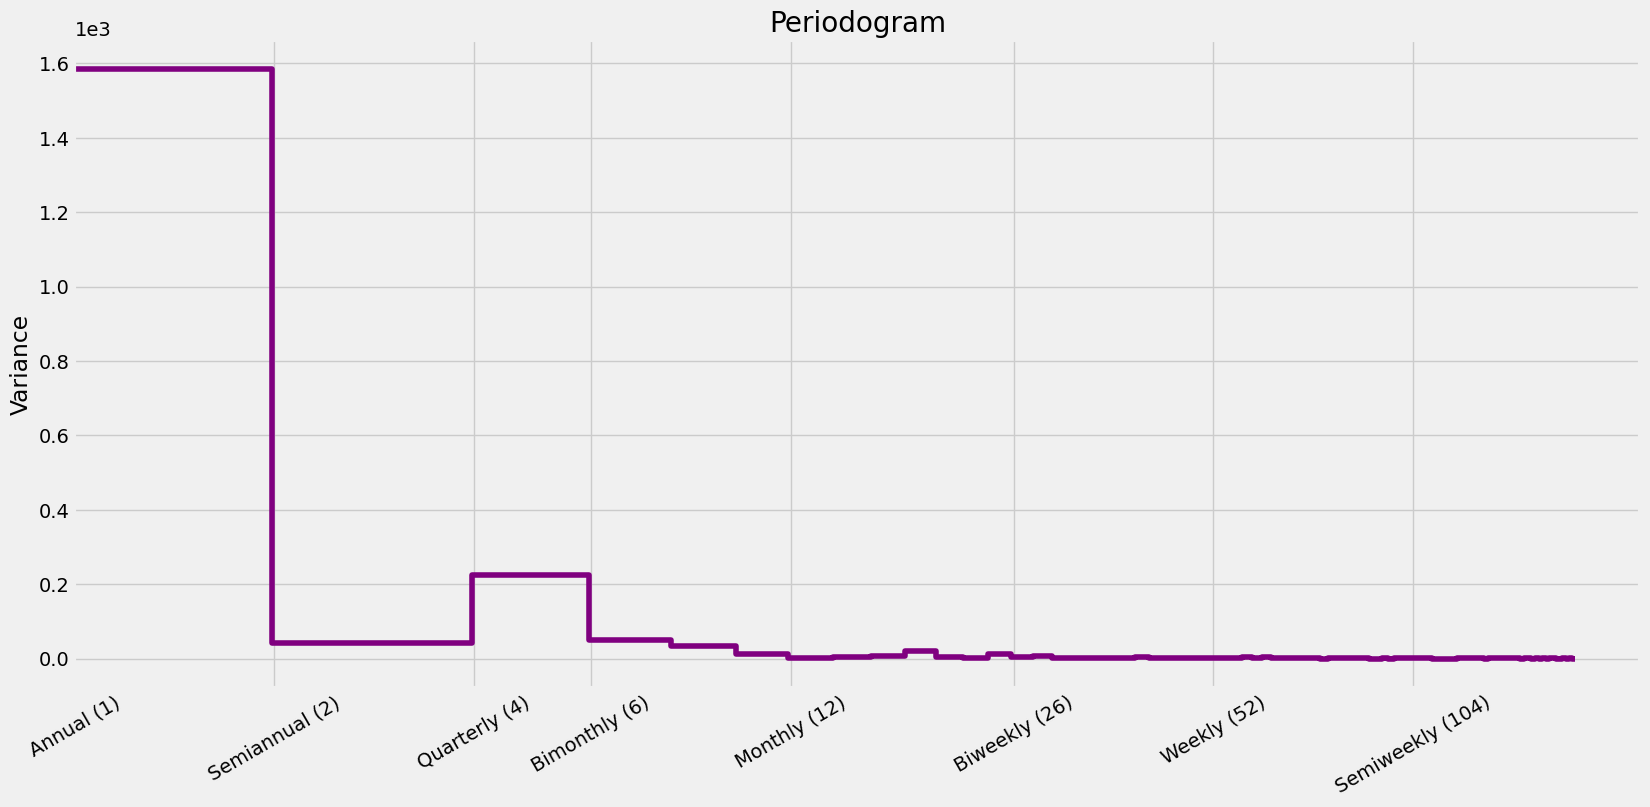

In [80]:
plot_periodogram(X_avb['Series'])

In [126]:
# Step 1: Change the index to datetime format to give it the period character
X_avb.index = pd.to_datetime(X_avb.index).to_period("D")

In [128]:
# Step 2: Accoridng to alnalysis from periodogram, select suitable features
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq ='A' , order = 4 )
dp = DeterministicProcess(
    index=X_avb.index,
    constant=True,        # Dummy feature for bias
    order=1,              # Trend (order = 1 -> linear)
    seasonal = False,     # Weekly seasonality (according to the period we selected for the data)
    drop=True,            # Drop terms to avoid collinearity
    additional_terms = [fourier]    # Add other frequency features (in this case from annual up to Bimonthly)
)
X = dp.in_sample()

In [129]:
X

const  trend  sin(1,freq=A-DEC)  cos(1,freq=A-DEC)  \
Date                                                             
2019-01-01    1.0    1.0           0.000000           1.000000   
2019-01-02    1.0    2.0           0.017213           0.999852   
2019-01-03    1.0    3.0           0.034422           0.999407   
2019-01-04    1.0    4.0           0.051620           0.998667   
2019-01-07    1.0    5.0           0.103102           0.994671   
...           ...    ...                ...                ...   
2019-09-24    1.0  180.0          -0.991114          -0.133015   
2019-09-25    1.0  181.0          -0.993257          -0.115935   
2019-09-26    1.0  182.0          -0.995105          -0.098820   
2019-09-27    1.0  183.0          -0.996659          -0.081676   
2019-09-30    1.0  184.0          -0.999546          -0.030120   

            sin(2,freq=A-DEC)  cos(2,freq=A-DEC)  sin(3,freq=A-DEC)  \
Date                                                                  
2019-01-01           0.000000           1.000000           0.000000   
2019-01-02           0.034422           0.999407           0.051620   
2019-01-03           0.068802           0.997630           0.103102   
2019-01-04           0.103102           0.994671           0.154309   
2019-01-07           0.205104           0.978740           0.304921   
...                       ...                ...                ...   
2019-09-24           0.263665          -0.964614           0.920971   
2019-09-25           0.230306          -0.973118           0.939856   
2019-09-26           0.196673          -0.980469           0.956235   
2019-09-27           0.162807          -0.986658           0.970064   
2019-09-30           0.060213          -0.998186           0.995919   

            cos(3,freq=A-DEC)  sin(4,freq=A-DEC)  cos(4,freq=A-DEC)  
Date                                                                 
2019-01-01           1.000000           0.000000           1.000000  
2019-01-02           0.998667           0.068802           0.997630  
2019-01-03           0.994671           0.137279           0.990532  
2019-01-04           0.988023           0.205104           0.978740  
2019-01-07           0.952378           0.401488           0.915864  
...                       ...                ...                ...  
2019-09-24           0.389630          -0.508671           0.860961  
2019-09-25           0.341571          -0.448229           0.893919  
2019-09-26           0.292600          -0.385663           0.922640  
2019-09-27           0.242850          -0.321270           0.946988  
2019-09-30           0.090252          -0.120208           0.992749  

[184 rows x 10 columns]

In [130]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, X_avb['Series'])

X_avb['S fitted'] = model.predict(X)
X_fore = dp.out_of_sample(steps=61)
X_pred['S forecast'] = model.predict(X_fore)

<Axes: xlabel='Date'>

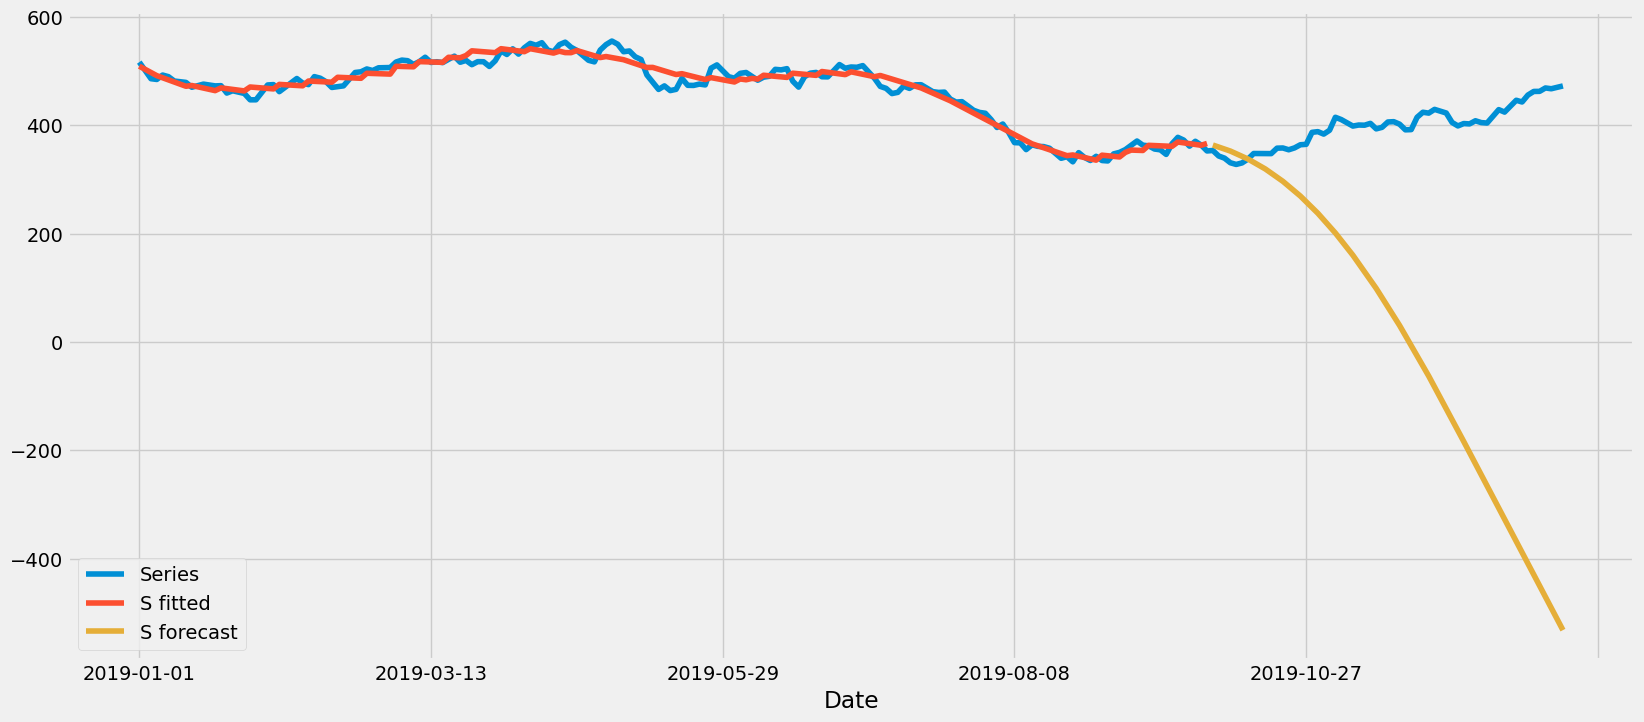

In [131]:
df_VWAP['S fitted'] = X_avb['S fitted']
df_VWAP['S forecast'] = X_pred['S forecast']

df_VWAP.loc[:,['Series','S fitted', 'S forecast']].plot()

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

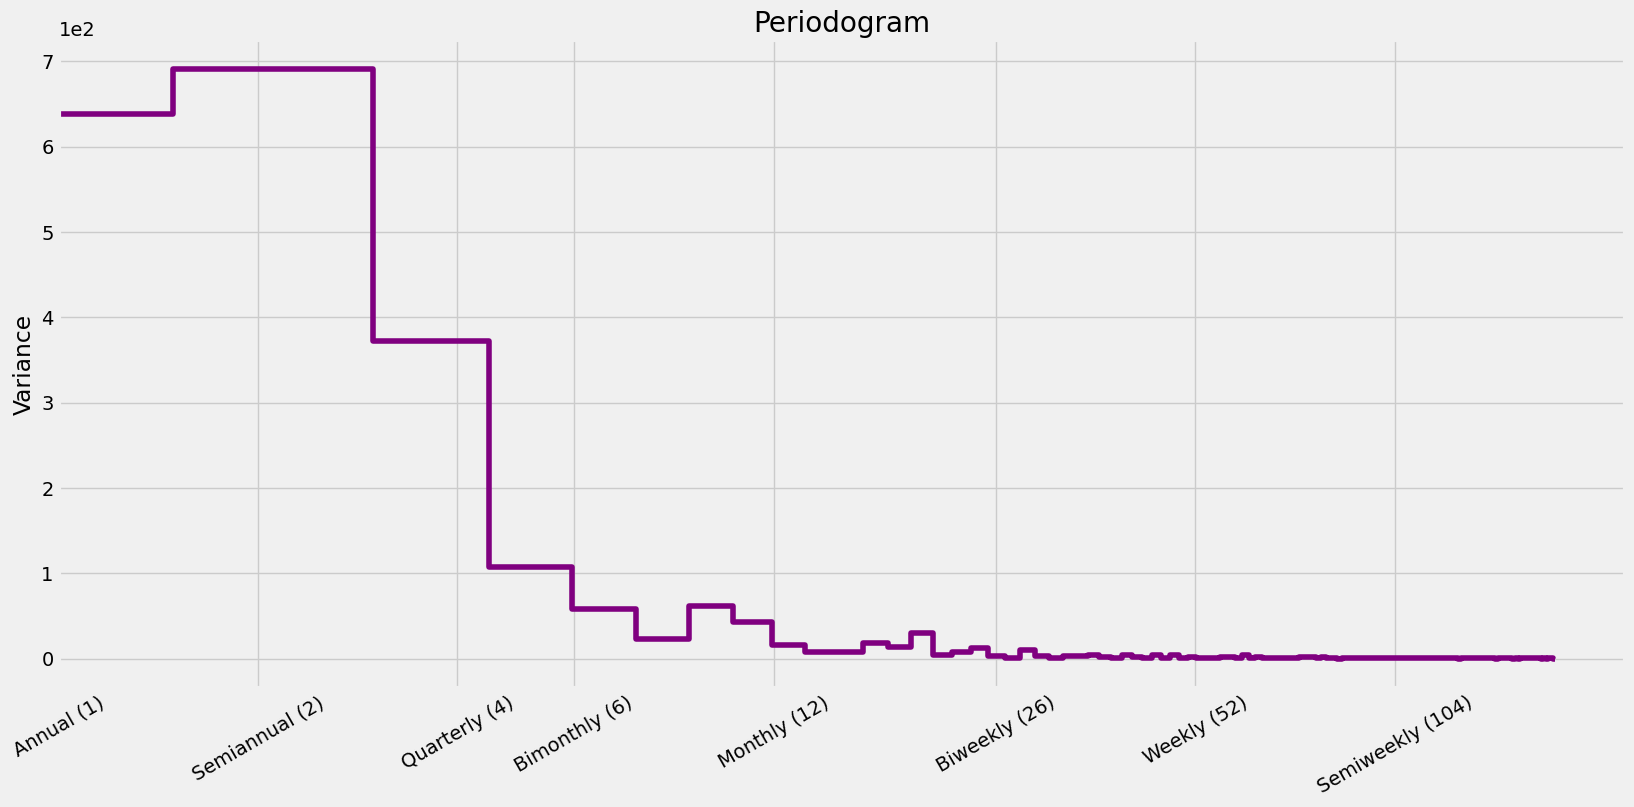

In [86]:
plot_periodogram(df_VWAP['Series'])     # In order to predict better, give the periodogram test and train data together (full cycles)

In [132]:
df_VWAP.index = pd.to_datetime(df_VWAP.index).to_period("D")
fourier = CalendarFourier(freq ='A' , order = 8 )
dp = DeterministicProcess(
    index=df_VWAP.index,
    constant=True,        # Dummy feature for bias
    order=1,              # Trend (order = 1 -> linear)
    seasonal = False,     # Weekly seasonality (according to the period we selected for the data)
    drop=True,            # Drop terms to avoid collinearity
    additional_terms = [fourier]    # Add other frequency features (in this case from annual up to Bimonthly)
)
X = dp.in_sample()

<Axes: xlabel='Date'>

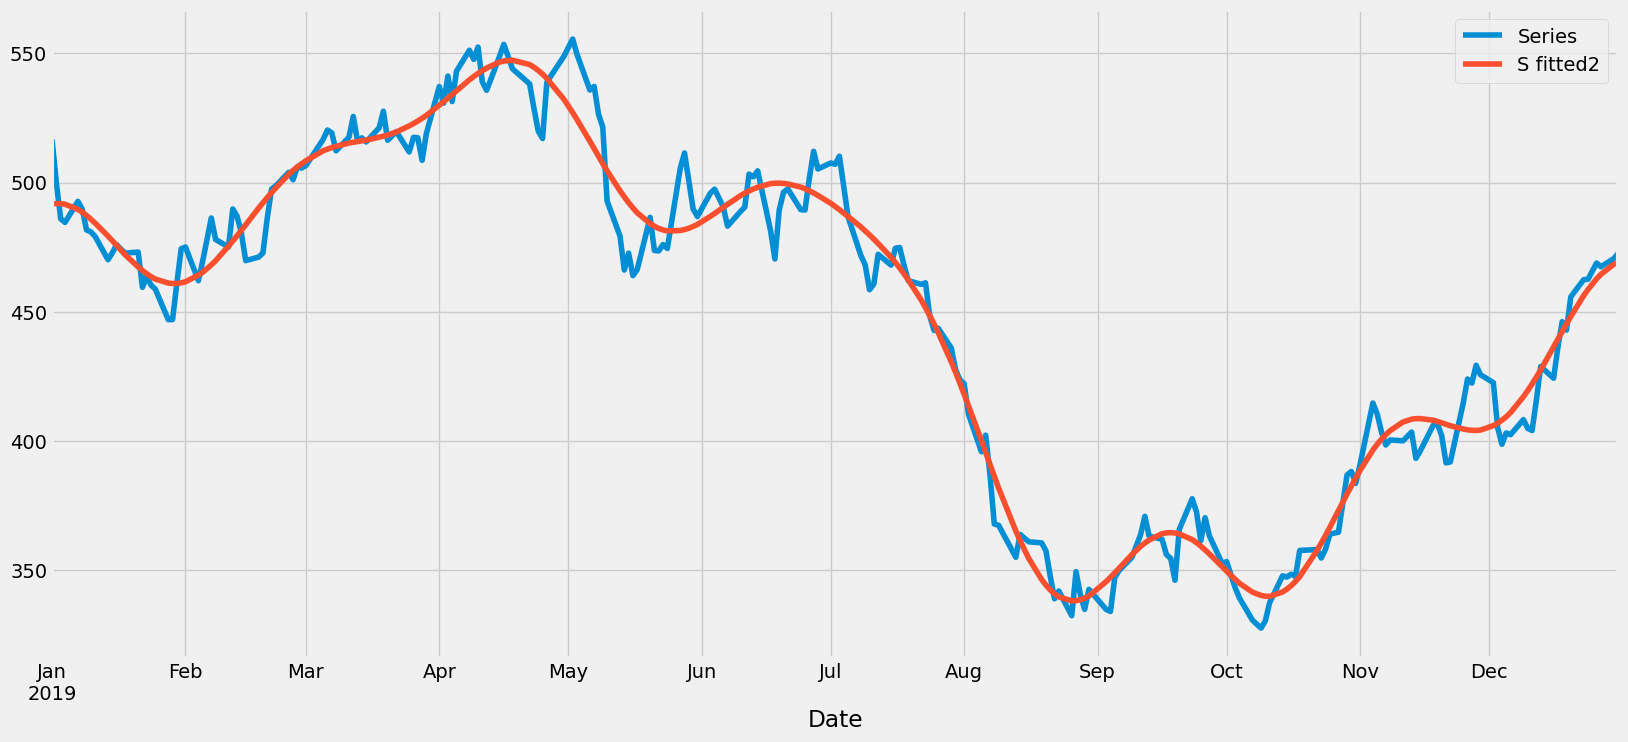

In [101]:
model = LinearRegression(fit_intercept=False)
model.fit(X, df_VWAP['Series'])

df_VWAP['S fitted2'] = model.predict(X)
df_VWAP.loc[:,['Series','S fitted2']].plot()

Text(0.5, 1.0, 'Deseasonalised')

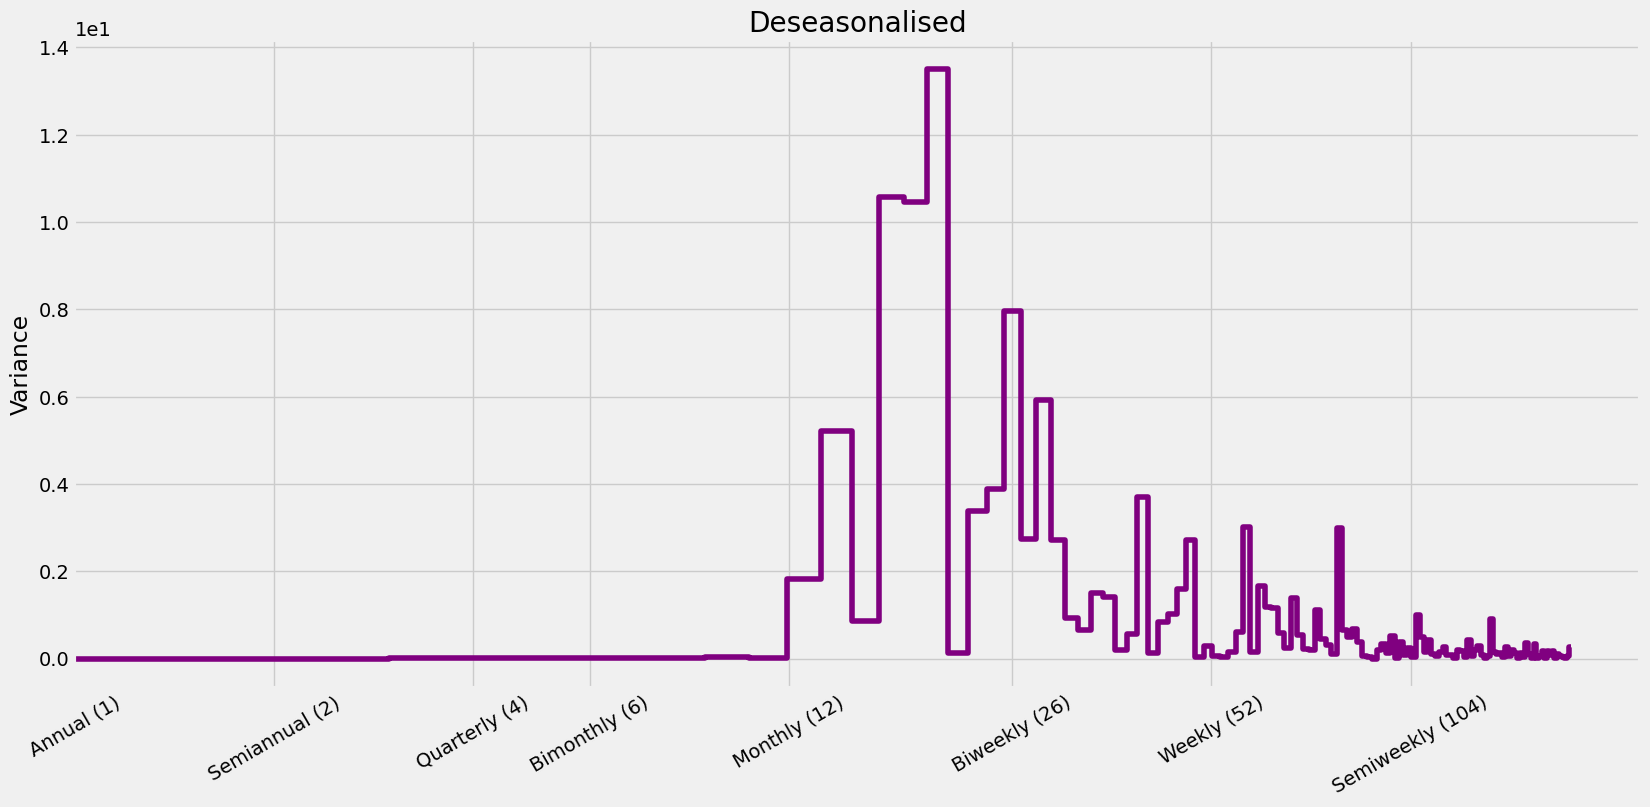

In [103]:
plot_periodogram(df_VWAP['Series']-df_VWAP['S fitted2'])
plt.title('Deseasonalised')

# Classical Forecasting Models


## Naive Forecast

<Axes: xlabel='Date'>

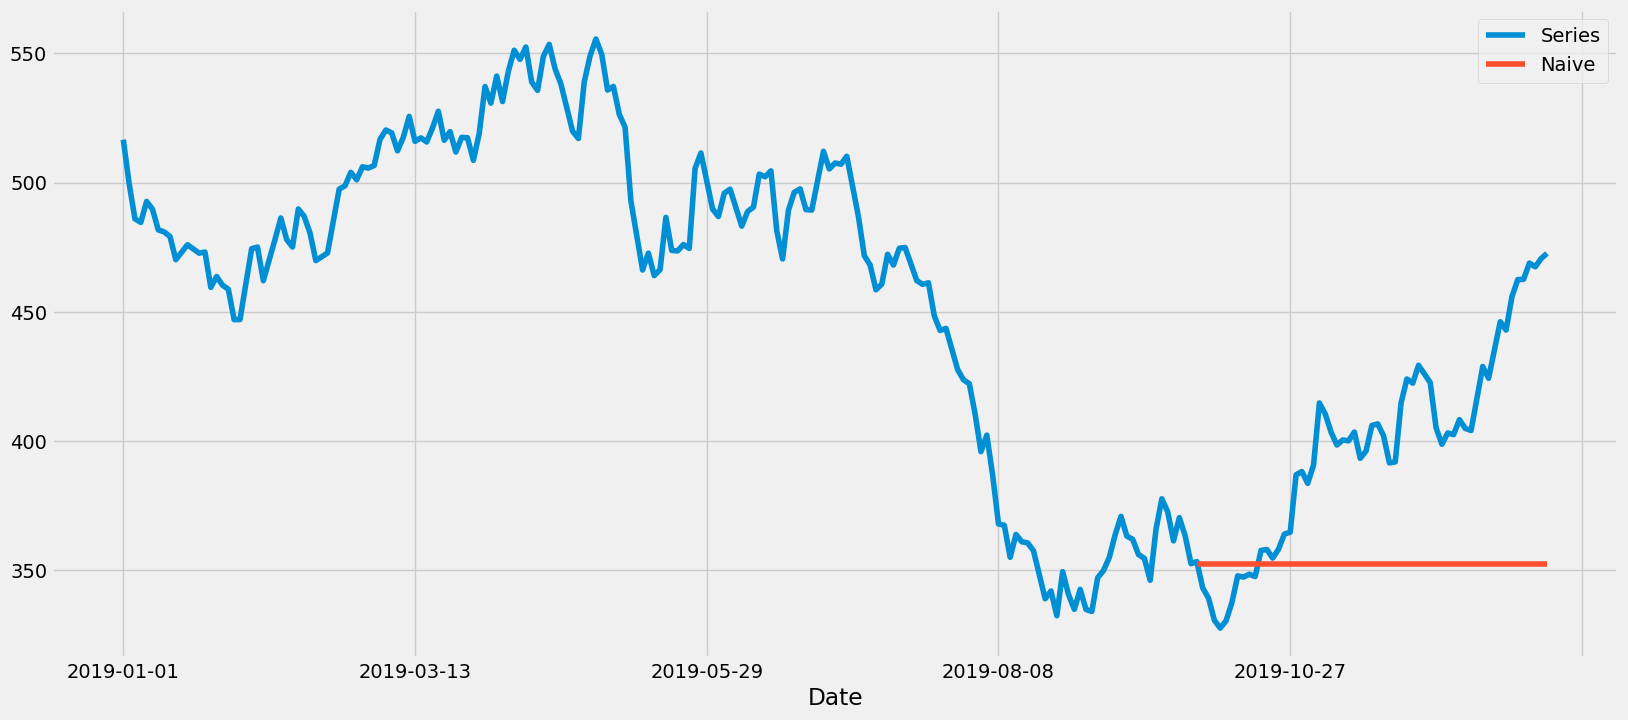

In [146]:
df_VWAP.index = df_plot.index     # Reindex the VWAP dataframe with str (not PreiodicDtype)
X_pred['Naive'] = np.ones(len(X_pred))*X_avb.iloc[-1,0]
df_VWAP['Naive'] = X_pred['Naive']
df_VWAP.loc[:,['Series','Naive']].plot()

## Moving Average Forecast

<Axes: xlabel='Date'>

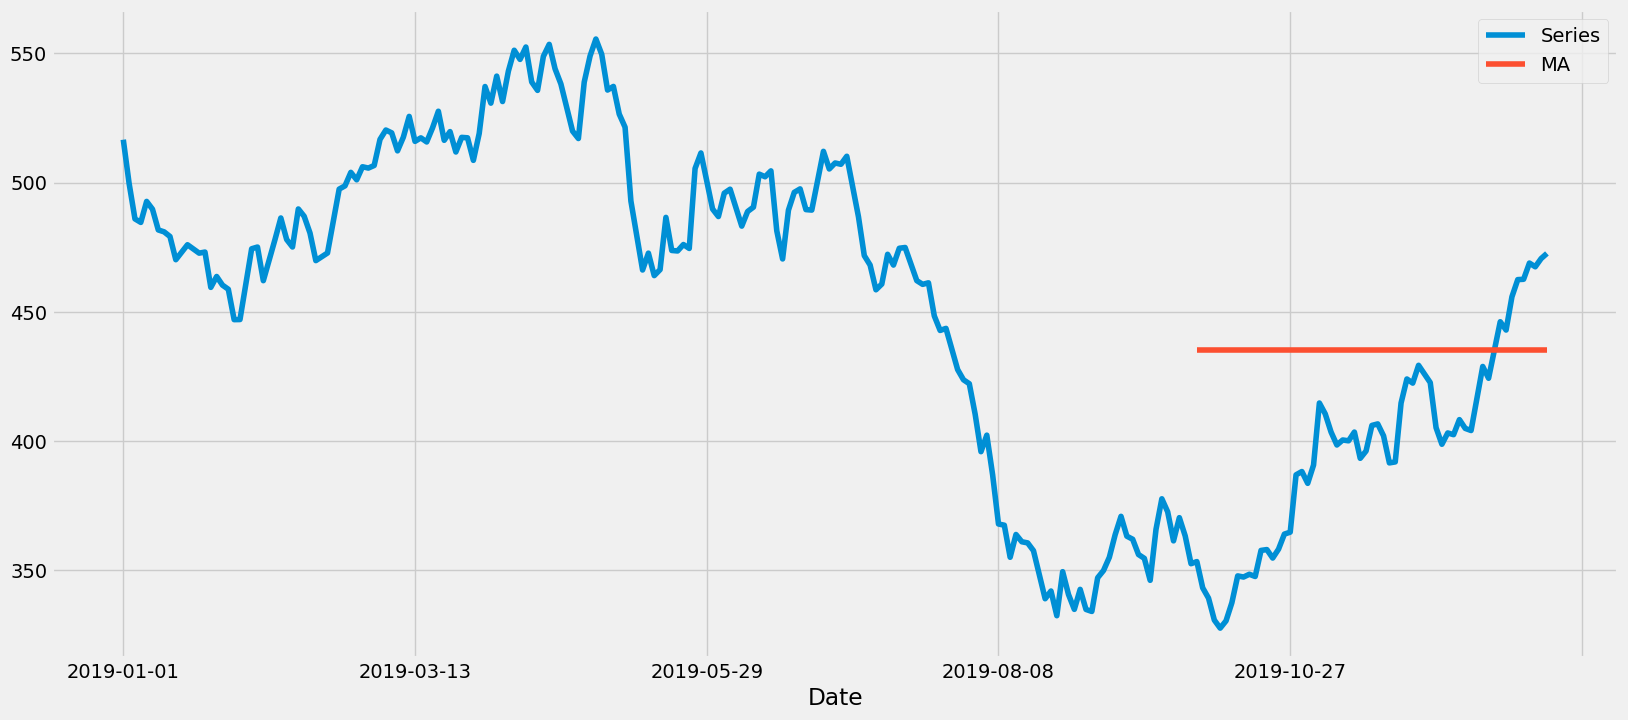

In [149]:
Mean_X_avb = X_avb['Series'].rolling(window = 100, min_periods = 20).mean()
X_pred['MA'] = np.ones(len(X_pred))*Mean_X_avb.iloc[-1]
df_VWAP['MA'] = X_pred['MA']
df_VWAP.loc[:,['Series', 'MA']].plot()

## Exponential Smoothing

***Simple Exponential Smoothing Methond (Brown Mehtod)***

This method Forecasts a constant value for future

\begin{equation}
Y_t = \alpha X_t + (1-\alpha) Y_{t-1} \quad;\quad   0< \alpha< 1
\end{equation}

or equivalently:

\begin{equation}
Y_t = Y_{t-1} + \alpha (X_t - Y_{t-1})
\end{equation}

As a rule of thumb, you need at least $\frac{3}{\alpha}$ samples for Exponential smoothing model to be able to keep up with the time series.

This model will predict future values of the time series as
\begin{equation}
\hat X_{t+h} = Y_t \quad  \forall h
\end{equation}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


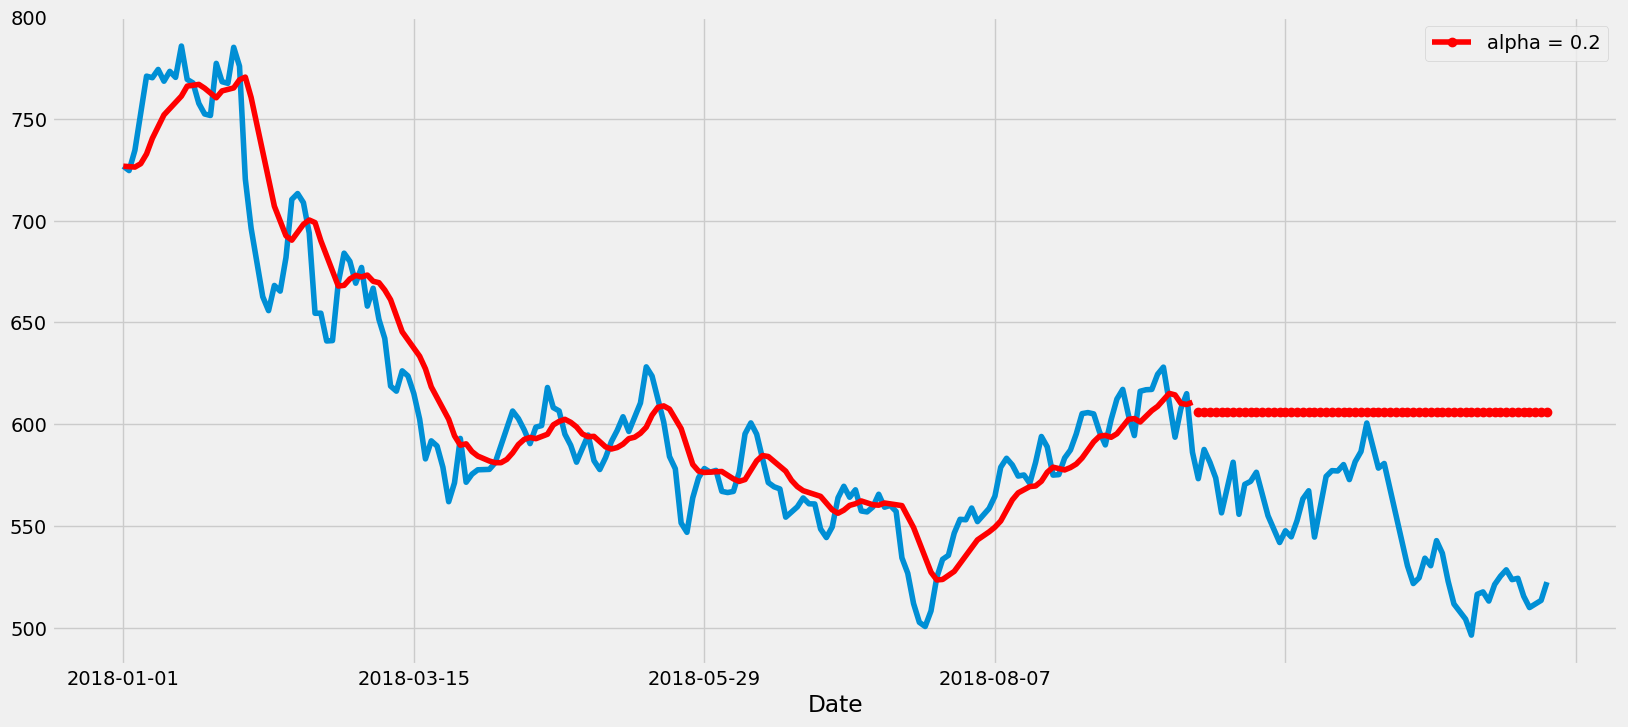

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


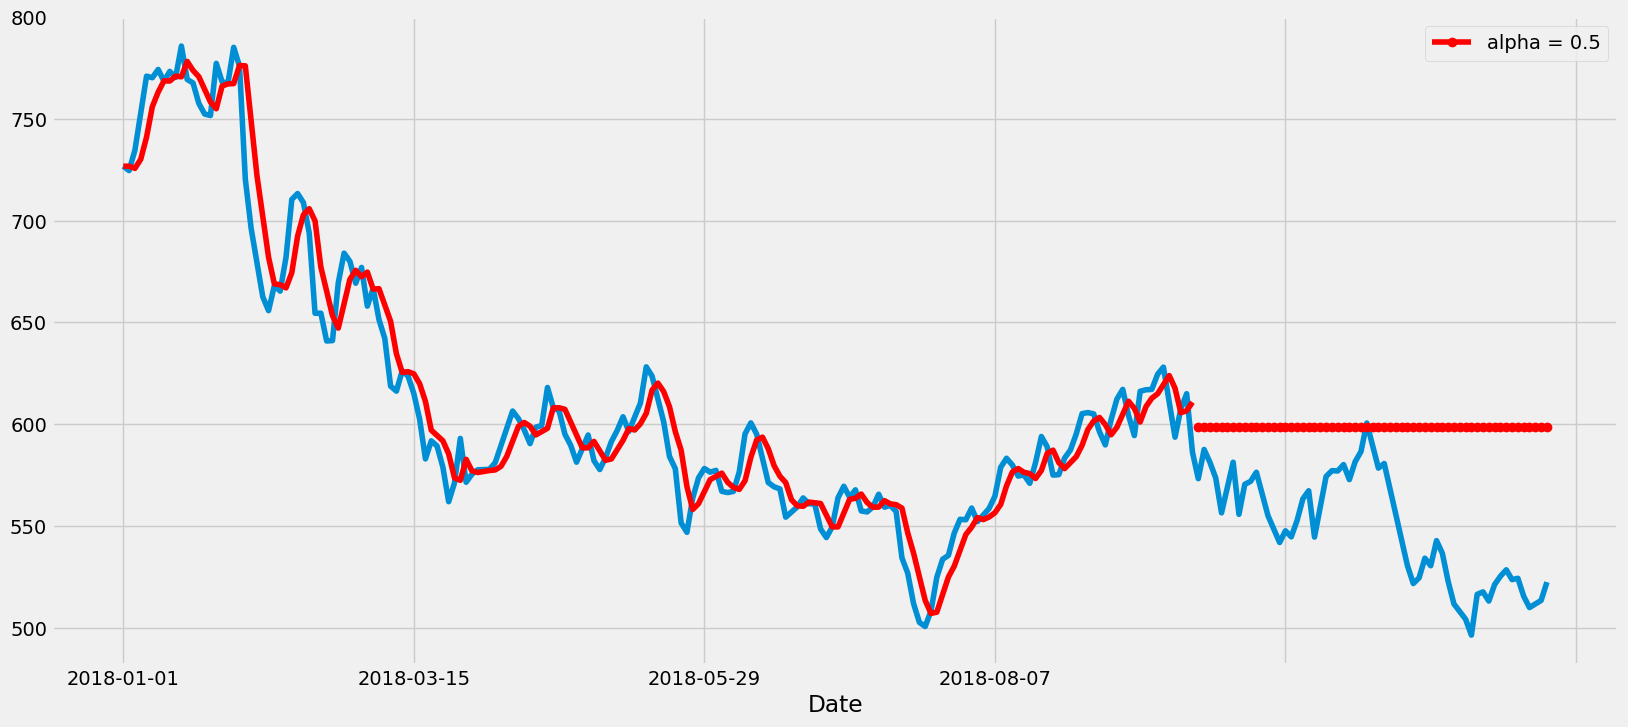

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


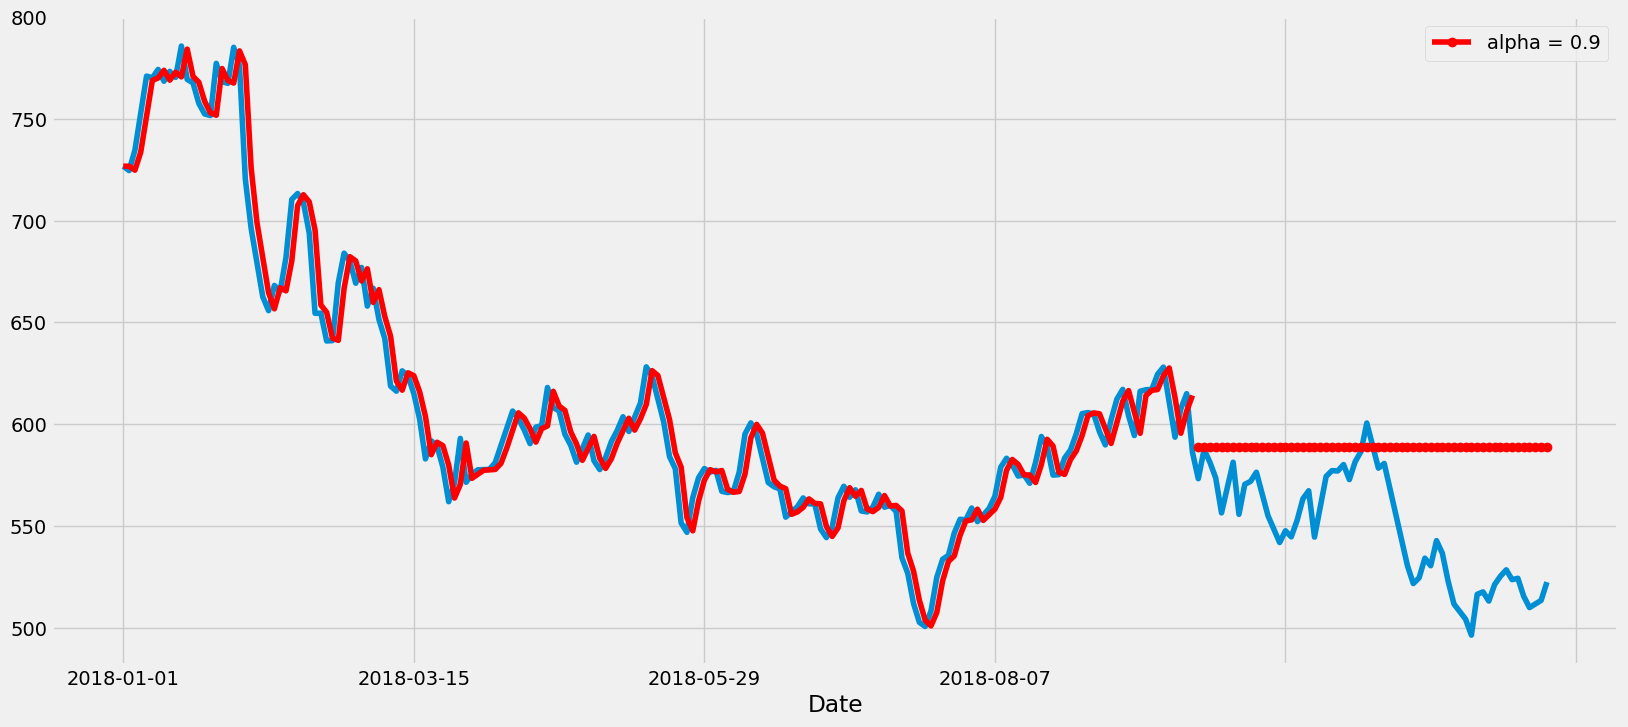

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

for alpha_sm in [0.2 , 0.5, 0.9]:

    df_plot['VWAP'].plot()
    fit1 = SimpleExpSmoothing(X_avb['Series']).fit(smoothing_level = alpha_sm  ,optimized=False)
    fcast1 = fit1.forecast(61).rename('alpha = ' + str(alpha_sm))
    fcast1.plot(marker='o', color='red', legend=True)
    fit1.fittedvalues.plot(  color='red')
    plt.show()

**Double Exponential Smoothing**

While previous model learns to predict the intercept of the time series, This model will learn the trend on top of that.

\begin{equation}
Y_t = \alpha X_t + (1-\alpha) (Y_{t-1}+b_{t-1})
\end{equation}

\begin{equation}
b_t = \beta (Y_t-Y_{t-1})+(1-\beta)b_{t-1}  
\end{equation}

where
$Y_1 = X_1$, $b_1 = X_0$ and $0<b_t<1$, and the forecast of the times series will be as followed

\begin{equation}
\hat X_{t+h} = Y_t + h b_t
\end{equation}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-85-e8d98616fd3d>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit2 = Holt(X_avb['Series']).fit(smoothing_level = alpha, smoothing_slope = beta, optimized = False)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

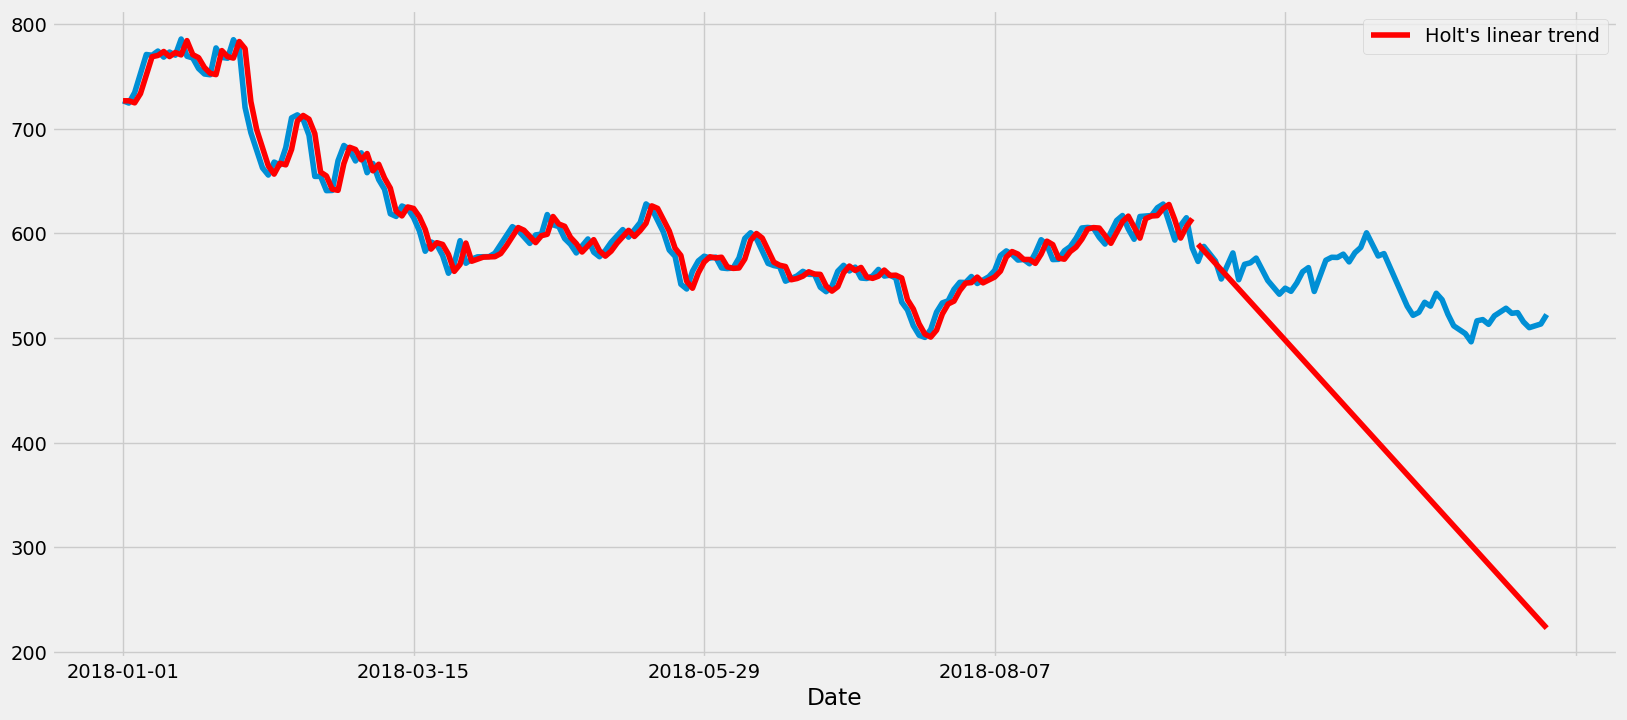

In [ ]:
alpha, beta = 0.5,0.5
df_plot['VWAP'].plot()
fit2 = Holt(X_avb['Series']).fit(smoothing_level = alpha, smoothing_slope = beta, optimized = False)
fcast = fit2.forecast(61).rename("Holt's linear trend")
fit1.fittedvalues.plot(color='red')
fcast.plot(color='red', legend=True)

**Triple Exponential Smoothing (Holt-WInters smoothing)**

Adding another constant would predict smoothed seasonal patterns

\begin{equation}
Y_t = \alpha (X_t-c_{t-L}) + (1-\alpha) (Y_{t-1}+b_{t-1})
\end{equation}

\begin{equation}
b_t = \beta (Y_t - Y_{t-1}) + (1-\beta) b_{t-1}
\end{equation}

\begin{equation}
c_t = \gamma (X_t-Y_{t-1}-b_{t-1}) + (1-\gamma) c_{t-L}
\end{equation}

where $ 0< \gamma <1$. For each seasonal observation a seasonal term is required. so there is various $c$ with various periods $L$ are available in this model. like each day of the week has its own constant if weekly seasonality is desired. Keep in mind, if we're going to find a seasonal pattern we obviously need more than $2*L$ observations. The series is predicted for upcoming time steps as below:

\begin{equation}
\hat X_{t+h} = Y_t + hb_t + c_{(t-L+h) mod L}
\end{equation}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


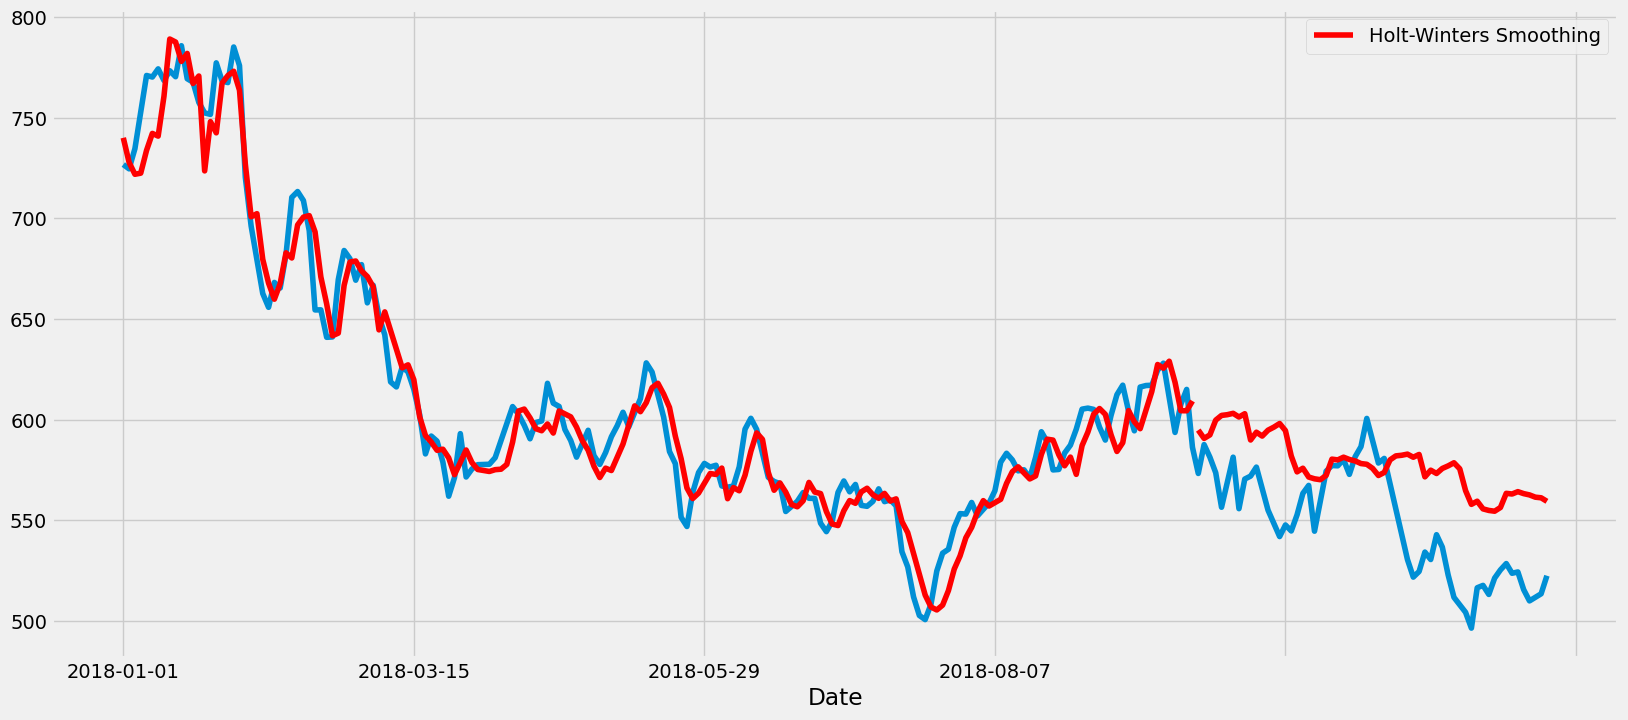

In [ ]:
df_plot['VWAP'].plot()
fit3 = ExponentialSmoothing(X_avb['Series'], seasonal_periods = 30, trend = 'add', seasonal = 'add', use_boxcox = True)
fit3 = fit3.fit(smoothing_level = alpha)
fit3.fittedvalues.plot(color='red')
fit3.forecast(61).rename('Holt-Winters Smoothing').plot(color='red',legend=True)
plt.show()

In [ ]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                   Series   No. Observations:                  185
Model:             ExponentialSmoothing   SSE                          34636.056
Optimized:                         True   AIC                           1035.975
Trend:                         Additive   BIC                           1145.467
Seasonal:                      Additive   AICC                          1053.975
Seasonal Periods:                    30   Date:                 Sun, 07 Jan 2024
Box-Cox:                           True   Time:                         21:24:07
Box-Cox Coeff.:                -3.87098                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5000000                alpha                False
smoothing_trend               0.0050000                 beta                 True
smoothing_seasonal            0.0050000                gamma                 True
initial_level                 0.2583324                  l.0                 True
initial_trend               -4.1592e-14                  b.0                 True
initial_seasons.0            3.7436e-14                  s.0                 True
initial_seasons.1            1.8118e-14                  s.1                 True
initial_seasons.2            9.8884e-15                  s.2                 True
initial_seasons.3           -1.4537e-14                  s.3                 True
initial_seasons.4             -3.24e-15                  s.4                 True
initial_seasons.5            -5.474e-14                  s.5                 True
initial_seasons.6           -1.6283e-13                  s.6                 True
initial_seasons.7           -8.7187e-14                  s.7                 True
initial_seasons.8            1.5641e-13                  s.8                 True
initial_seasons.9            2.4757e-13                  s.9                 True
initial_seasons.10           2.8024e-13                 s.10                 True
initial_seasons.11           3.1995e-13                 s.11                 True
initial_seasons.12           2.8542e-13                 s.12                 True
initial_seasons.13           3.5435e-13                 s.13                 True
initial_seasons.14          -2.4404e-14                 s.14                 True
initial_seasons.15           1.2598e-13                 s.15                 True
initial_seasons.16           8.9852e-14                 s.16                 True
initial_seasons.17           2.0311e-13                 s.17                 True
initial_seasons.18           2.6904e-13                 s.18                 True
initial_seasons.19           3.4061e-13                 s.19                 True
initial_seasons.20           2.4552e-13                 s.20                 True
initial_seasons.21          -1.4533e-13                 s.21                 True
initial_seasons.22          -3.9971e-13                 s.22                 True
initial_seasons.23           -3.089e-13                 s.23                 True
initial_seasons.24          -4.4686e-13                 s.24                 True
initial_seasons.25          -4.6003e-13                 s.25                 True
initial_seasons.26          -4.5431e-13                 s.26                 True
initial_seasons.27          -3.5025e-13                 s.27                 True
initial_seasons.28          -3.8767e-14                 s.28                 True
initial_seasons.29          -3.2383e-14                 s.29                 True
--------------------------

## Classical Linear Models
Until 1980s, ARIMA processes were the workhorses of time series analysis, which for many people meant just finding right order of such model. This class of processes is defined through linear relationship between observation and noise factors.

A linear process is a time series $X_t$ defined by
\begin{equation}
X_t = \sum_{u=-\infty}^{\infty}\psi_u \epsilon_{t-u}
\end{equation}

Where $\epsilon_t$ is a white noise and
\begin{equation}
\sum_{u=-\infty}^{\infty} |\psi_u|^2 <\infty
\end{equation}

### AR Processes
The simplest linear process is and autoregressive process which has already been introduced. An autoregressive of order p is written as:

\begin{equation}
X_t = \sum_{i=1}^{p} \phi_i X_{t-i} +\epsilon_t
\end{equation}

The forecoming code snippet will illustrate another meand of producing AR process using statsmodels library

\begin{equation}
X_t = 0.9X_{t-1} + \epsilon_t
\end{equation}

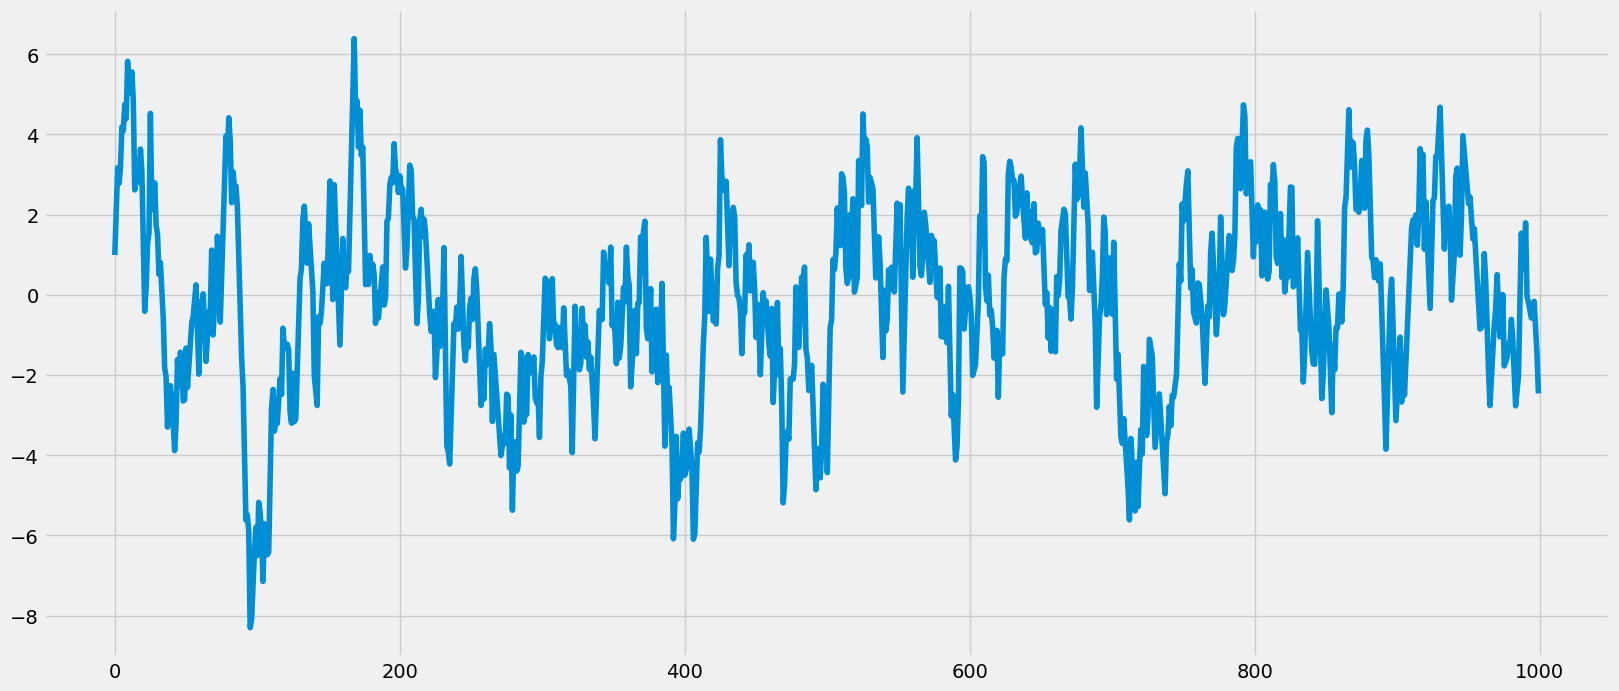

In [277]:
# 7. AR signal revisited once more!
from statsmodels.tsa.arima_process import ArmaProcess

ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1,ma1)
simulated_data1 = AR_object1.generate_sample(nsample = 1000)
plt.plot(simulated_data1)

### MA Process
A moving average process is made up of error forecasts of previous steps. A moving average process of order q can be concluded by

\begin{equation}
X_t = \epsilon_t + \sum_{i=1}^{q} \theta_i \epsilon_{t-i}
\end{equation}

Here a moving average is implemnted using statsmodels library

\begin{equation}
X_t = \epsilon_t +0.9 \epsilon_{t-1}
\end{equation}

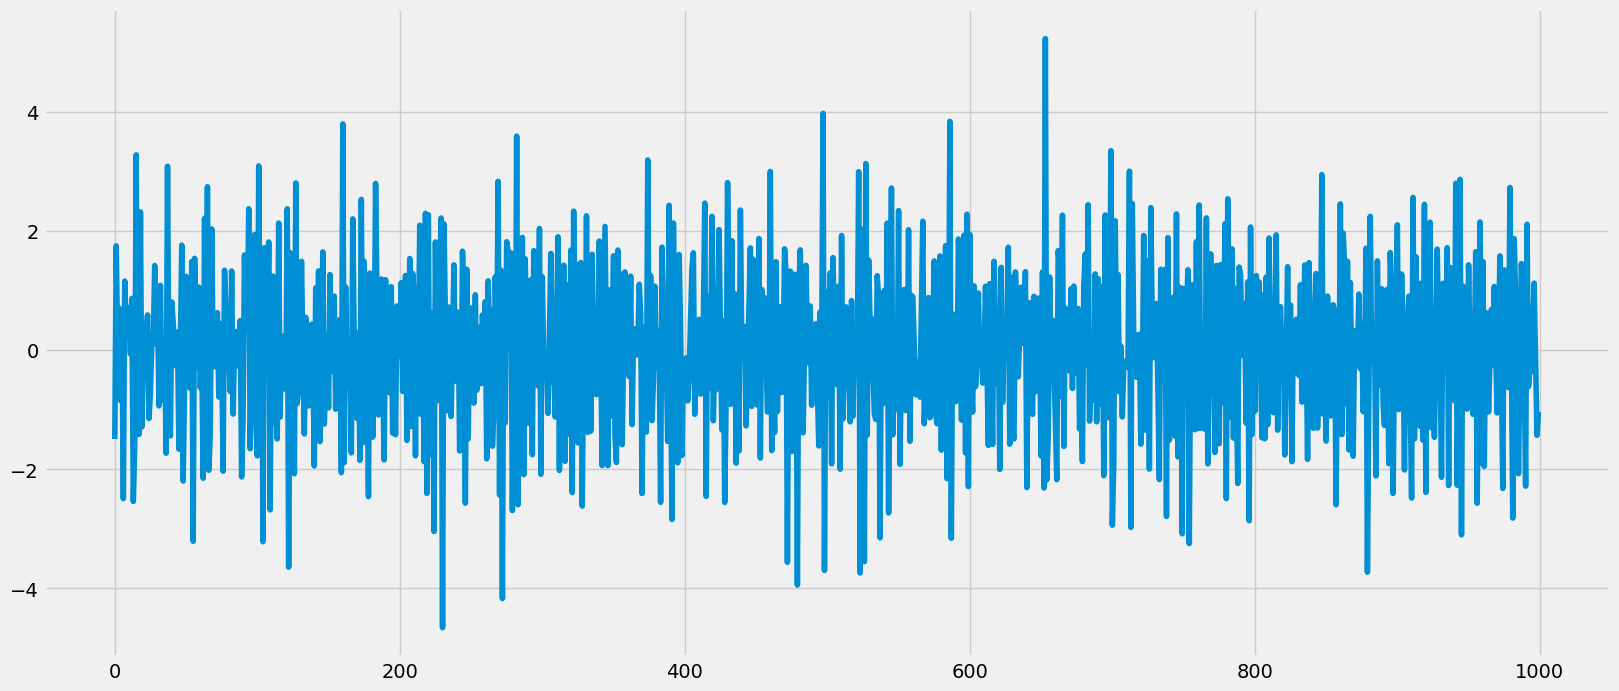

In [279]:
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object = ArmaProcess(ar1,ma1)
simulated_data1 = MA_object.generate_sample(nsample= 1000)
plt.plot(simulated_data1)

---

**Excercise:**

Construct arbitrary AR(p) and MA(q) series, then, by generating ACF and PACF plots, endeavour to elucidate these series and their characteristics

---

### ARMA Process

As the name suggest, this process is a combination of a AR(p) process and a MA(q) process as below

\begin{equation}
X_t = \sum_{i=1}^{p} \phi_i X_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \epsilon_t
\end{equation}

ARMA can be used to forecast time series which are <u>stationary</u> using the ACF and PACF plot as explained in the previous chapters.

Shortfalls of this model:
*   Can't predict deterministic trends
*   Seasonality is ignored
*   Model if only the series is stationary and performance detroits otherwise

### ARIMA Process

A Process $X_t$ is ARIMA(p,d,q) if and only if $\nabla^d X_t$ is a stationary ARMA(p,q) Which meand the series will be stationary after d times of diffrentiating.

* ARIMA(0,0,0) is simply a white noise
* ARIMA(0,1,0) is random walk
* ARIMA(p,0,0) is AR(p)
* ARIMA(0,0,q) is MA(q)
* ARIMA(0,1,1) is equivalent to single exponential smoothing
* ARIMA(0,2,2) is equivalent to double exponential smoothing

A more complex divergent of this model is known as **SARIMA** where seasonal patterns has been taken to the consideration. SARIMA is denoted as ARIMA(p,d,q)(P,D,Q)m where
* m refers to the number of periods in each season
* p,d,q are the ARIMA part
* P,D,Q are termms for seasonal patterns

for each seasonal variable, data is sampled for each m steps, then the sampled data are treated according to the ARIMA method.

Another still more complicated divergent of the SARIMA is **SARIMAX**, where X stands for exogenous data when there is a correlation between our time series and other times series which will be used as exogenous data, since they are exogenous to our series modeling.



In [155]:
!pip install pmdarima statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.4 MB/s eta 0:00:00


In [156]:
import itertools
import numpy as np
from random import gauss

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess


import warnings
import matplotlib.pyplot as plt
%matplotlib inline

from pmdarima.arima import auto_arima
import pmdarima as pmd
# pmd.pipline pmd.model_selection pmd.preprocessing pmd.arima

#from fbprophet import prophet


warnings.simplefilter(action='ignore', category= FutureWarning)



Some external features are slected and created as the exogenous variable of the SARIMAX. These features are rolling statistics over the last 3 days for the price and volume characteristics.

In [193]:
lag_features = ["High", "Low", "Volume"]
window_size = 3
exogenous_features = []

df_rolled = df[lag_features].rolling(window = window_size, min_periods=0)
df_mean = df_rolled.mean().shift(1).reset_index()
df_std = df_rolled.std().shift(1).reset_index()

In [194]:
for feature in lag_features:
    df[feature + '_mean_lag' + str(window_size)] = df_mean[feature].values
    exogenous_features.append(feature + '_mean_lag' + str(window_size))
    df[feature + '_std_lag' + str(window_size)] = df_std[feature].values
    exogenous_features.append(feature + '_std_lag' + str(window_size))

In [195]:
df.head()

Symbol Series  Prev Close    Open   High     Low    Last   Close  \
Date                                                                          
2000-01-03  TISCO     EQ      142.35  148.00  153.2  146.10  152.50  152.45   
2000-01-04  TISCO     EQ      152.45  150.10  153.0  143.05  151.95  150.80   
2000-01-05  TISCO     EQ      150.80  144.60  162.9  144.60  158.00  156.55   
2000-01-06  TISCO     EQ      156.55  158.95  169.1  158.95  169.00  168.25   
2000-01-07  TISCO     EQ      168.25  173.40  179.0  166.30  170.55  171.95   

              VWAP   Volume      Turnover       Trades  Deliverable Volume  \
Date                                                                         
2000-01-03  150.92  2003185  3.023164e+13  93969.26873        1.834714e+06   
2000-01-04  151.03  1555136  2.348785e+13  93969.26873        1.834714e+06   
2000-01-05  156.85  3840284  6.023364e+13  93969.26873        1.834714e+06   
2000-01-06  167.61  2560449  4.291530e+13  93969.26873        1.834714e+06   
2000-01-07  173.89  3641691  6.332459e+13  93969.26873        1.834714e+06   

            %Deliverble  High_mean_lag3  High_std_lag3  Low_mean_lag3  \
Date                                                                    
2000-01-03      0.26237             NaN            NaN            NaN   
2000-01-04      0.26237      153.200000            NaN     146.100000   
2000-01-05      0.26237      153.100000       0.141421     144.575000   
2000-01-06      0.26237      156.366667       5.658916     144.583333   
2000-01-07      0.26237      161.666667       8.120550     148.866667   

            Low_std_lag3  Volume_mean_lag3  Volume_std_lag3  
Date                                                         
2000-01-03           NaN               NaN              NaN  
2000-01-04           NaN      2.003185e+06              NaN  
2000-01-05      2.156676      1.779160e+06     3.168185e+05  
2000-01-06      1.525068      2.466202e+06     1.210894e+06  
2000-01-07      8.766746      2.651956e+06     1.145319e+06

In [196]:
df.fillna(df.dropna().mean(),inplace=True)
df.head()

Symbol Series  Prev Close    Open   High     Low    Last   Close  \
Date                                                                          
2000-01-03  TISCO     EQ      142.35  148.00  153.2  146.10  152.50  152.45   
2000-01-04  TISCO     EQ      152.45  150.10  153.0  143.05  151.95  150.80   
2000-01-05  TISCO     EQ      150.80  144.60  162.9  144.60  158.00  156.55   
2000-01-06  TISCO     EQ      156.55  158.95  169.1  158.95  169.00  168.25   
2000-01-07  TISCO     EQ      168.25  173.40  179.0  166.30  170.55  171.95   

              VWAP   Volume      Turnover       Trades  Deliverable Volume  \
Date                                                                         
2000-01-03  150.92  2003185  3.023164e+13  93969.26873        1.834714e+06   
2000-01-04  151.03  1555136  2.348785e+13  93969.26873        1.834714e+06   
2000-01-05  156.85  3840284  6.023364e+13  93969.26873        1.834714e+06   
2000-01-06  167.61  2560449  4.291530e+13  93969.26873        1.834714e+06   
2000-01-07  173.89  3641691  6.332459e+13  93969.26873        1.834714e+06   

            %Deliverble  High_mean_lag3  High_std_lag3  Low_mean_lag3  \
Date                                                                    
2000-01-03      0.26237      410.974755       6.542085     396.283973   
2000-01-04      0.26237      153.200000       6.542085     146.100000   
2000-01-05      0.26237      153.100000       0.141421     144.575000   
2000-01-06      0.26237      156.366667       5.658916     144.583333   
2000-01-07      0.26237      161.666667       8.120550     148.866667   

            Low_std_lag3  Volume_mean_lag3  Volume_std_lag3  
Date                                                         
2000-01-03      6.939031      6.155355e+06     1.710971e+06  
2000-01-04      6.939031      2.003185e+06     1.710971e+06  
2000-01-05      2.156676      1.779160e+06     3.168185e+05  
2000-01-06      1.525068      2.466202e+06     1.210894e+06  
2000-01-07      8.766746      2.651956e+06     1.145319e+06

In [200]:
# prepare the training / validation split
df_train = df.loc[(df.index >= '2019')& (df.index<'2019-10')].copy()
df_valid = df.loc[(df.index >= "2019-10")& (df.index<'2020')].copy()

exogenous_features = ['High_mean_lag3', 'High_std_lag3', 'Low_mean_lag3',
       'Low_std_lag3', 'Volume_mean_lag3', 'Volume_std_lag3',]

In [275]:
# fit ARIMA in the same manner as before
model_arima = auto_arima(df_plot.VWAP, exogenous=df.loc[(df.index >= '2019')& (df.index<'2020'),exogenous_features],
                   m = 60,
                   # max ranges for the p,q,P,Q parameters - can be extended
                   max_p= 4, max_q=4,
                   max_P = 4, max_Q = 4,
                   start_P =0, start_Q =1,
                   start_p = 2, start_q = 2 ,
                   trace=True, error_action="ignore", suppress_warnings=True)
model_arima.fit(df_train['VWAP'], exogenous=df_train[exogenous_features])

df_valid["Forecast_ARIMAX"] = model_arima.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features]).values

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,1)[60] intercept   : AIC=1771.215, Time=15.28 sec
 ARIMA(0,1,0)(0,0,0)[60] intercept   : AIC=1767.354, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[60] intercept   : AIC=1767.270, Time=3.71 sec
 ARIMA(0,1,1)(0,0,1)[60] intercept   : AIC=1766.601, Time=5.57 sec
 ARIMA(0,1,0)(0,0,0)[60]             : AIC=1765.453, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[60] intercept   : AIC=1769.172, Time=2.37 sec
 ARIMA(0,1,0)(0,0,1)[60] intercept   : AIC=1769.171, Time=2.36 sec
 ARIMA(0,1,0)(1,0,1)[60] intercept   : AIC=1771.170, Time=5.50 sec
 ARIMA(1,1,0)(0,0,0)[60] intercept   : AIC=1765.401, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[60] intercept   : AIC=1767.269, Time=4.41 sec
 ARIMA(1,1,0)(1,0,1)[60] intercept   : AIC=1769.269, Time=10.42 sec
 ARIMA(2,1,0)(0,0,0)[60] intercept   : AIC=1765.660, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[60] intercept   : AIC=1765.279, Time=0.49 sec
 ARIMA(1,1,1)(1,0,0)[60] intercept   : AIC=1767.217, Time=7.59 sec
 ARIMA(1,1,1)(0,0

The Akaike information criterion (AIC) is calculated from the maximum log-likelihood of the model and the number of parameters (K) used to reach that likelihood. The AIC function is 2K – 2(log-likelihood).

Lower AIC values indicate a better-fit model, and a model with a delta-AIC (the difference between the two AIC values being compared) of more than -2 is considered significantly better than the model it is being compared to.

In [ ]:
df_train.index = pd.to_datetime(df_train.index).to_period("D")

In [256]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX = SARIMAX(df_train['VWAP'], order = (2,0,2), seasonla_order = (0,0,1,60), exog =df_train[exogenous_features])
fitted = model_SARIMAX.fit()
df_valid['Forecast_SARIMAX'] = fitted.forecast(steps = len(df_valid),exog = df_valid[exogenous_features]).values

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

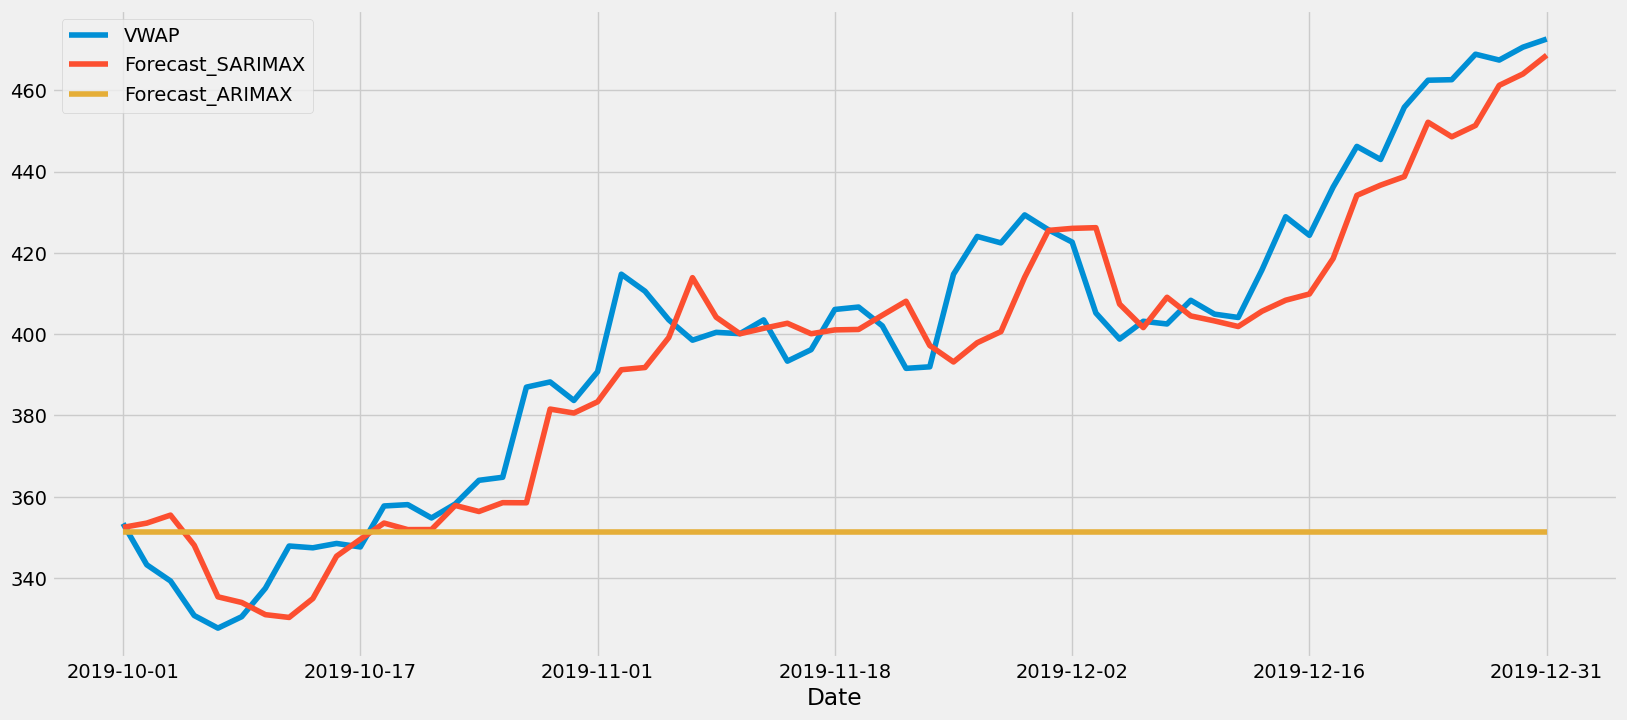

In [259]:
df_valid[['VWAP','Forecast_SARIMAX', 'Forecast_ARIMAX']].plot()

In [171]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 4729
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 7)   Log Likelihood              -17555.858
Date:                            Fri, 12 Jan 2024   AIC                          35117.716
Time:                                    02:28:06   BIC                          35137.100
Sample:                                         0   HQIC                         35124.529
                                           - 4729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2139      0.007     29.213      0.000       0.200       0.228
ar.S.L7        0.0380      0.009      4.319      0.000       0.021       0.055
sigma2        98.3397      0.665    147.902      0.000      97.037      99.643
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             54987.56
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""